# Personal Loan Campaign Modelling

## Background 

 AllLife Bank got data of his liablity customers, which is interested in converting this customers to  personal loan customers. 

## Objective 

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

## Dataset

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
# installing some external package that we need to use for grouping zipcodes to cities or counties, states etc.
!pip install uszipcode

In [210]:
# lets get strated with importing nessasary files 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from uszipcode import SearchEngine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Model tuning helpers
from sklearn.model_selection import GridSearchCV


In [211]:
# import Loa data 

df_t = pd.read_csv('Loan_Modelling.csv')
df_l = pd.read_csv('Loan_Modelling.csv')

In [212]:
# lets look how our data looks like 
df_t.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

 - we have 6 non categorical columns and remaining all categorical variables
 - All columns possibly could have an impact in making a decision on allowing loan for a customer or not, but will require further analysis

In [213]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


 - we have a data of 5000 record
 - we have all numeric data type columns
 - No missing value
 - we have 13 features 

In [214]:
df_t.describe()

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

1. The oldest  liability customers we have are of age 67 and the youngest customers are of age 23. Most of our customers' ages are greater than 35 and 25 % are greater than 55. We have higher distribution of age  with a standard deviation of 11.

2. We have a max of 43 years of work experience and min of -3 possible some error or an outlier as we don't have -ve experience, Average years of customers experience is about 20 years. same as age we have higher distribution experience with standard deviation of 11. 

3. Average income of our customer is around 73k with max of 224k and min of 8k. Same we have a higher standard deviation with 46k. Most of the applicants have an income of around 39k.

4. We have a customer max family size of 4 .
5. Maximum per month spending on credit cards is 10 with min 1, looks like our customers are not credit users. 
6. 75% of our customers hold bachelor's degrees, and 23 % hold advanced degrees.
7. 75 % of our customers don't have a mortgage loan , 25% have a mortgage of 101k.
8. 25% of our customers used online, have a CD account  , credit card and security account.
9. 75 % of the customers don't have a CD account, credit card or security account and never used online.




- Finding cities, states, and counties for the zip code provided.
- This will help to see some insight based on other features like cities and counties, states

In [215]:
l_zipcode = df_t['ZIPCode']
search = SearchEngine(simple_zipcode=True)
cities = [search.by_zipcode(z).major_city for z in l_zipcode]
df_t['cities'] = cities
df_t['states'] = [search.by_zipcode(z).state for z in l_zipcode]
df_t['county'] =  [search.by_zipcode(z).county for z in l_zipcode]

In [216]:
print("Number of zipcodes we have ", len(df_t['ZIPCode'].unique()))
print ("Number of cites we have", len(df_t['cities'].unique()))
print ("Number of states we have ", len(df_t['states'].unique()))
print ("Number of Counties we have ", len(df_t['county'].unique()))

Number of zipcodes we have  467
Number of cites we have 245
Number of states we have  2
Number of Counties we have  39


# Univariant Analysis

<AxesSubplot:ylabel='Frequency'>

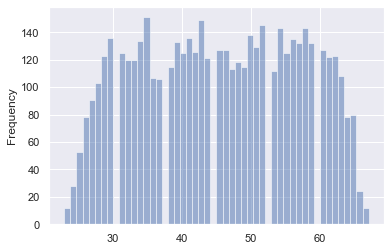

In [217]:
df_t.Age.plot.hist(bins=50, alpha=0.5)

- We can observe that age is widely distributed from 23 to 67

<AxesSubplot:>

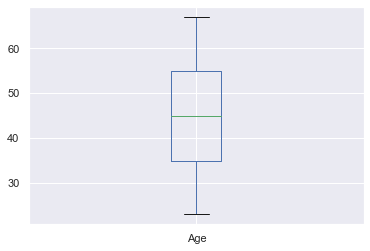

In [218]:
df_t.Age.plot.box()

- For Age no outlier's in both sides

<AxesSubplot:>

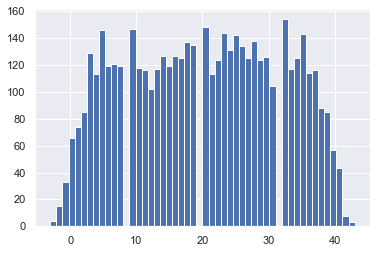

In [219]:
df_t.Experience.hist(bins=50)

- Experience as mentioned above we have -ve experience which need to be handled 
- Distributed from 0 to 40 years.
- which kind of aligns to the age distribution.

In [220]:
#
df_t['Experience'] = df_t['Experience'].abs()


<AxesSubplot:>

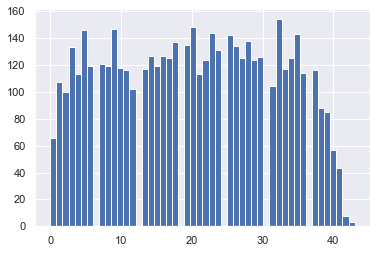

In [221]:
df_t.Experience.hist(bins=50)

<AxesSubplot:>

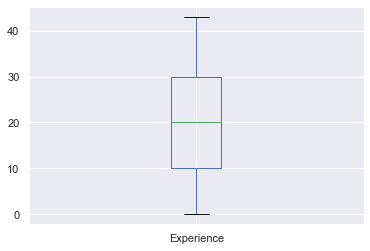

In [222]:
df_t.Experience.plot.box()

- No outlier with experience data

<AxesSubplot:>

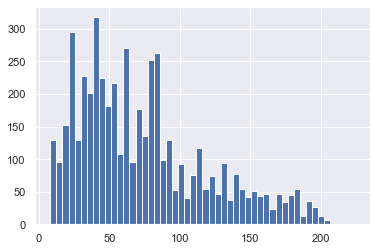

In [223]:
df_t.Income.hist(bins=50)

<AxesSubplot:>

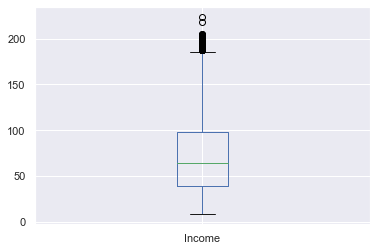

In [224]:
df_t.Income.plot.box()

- Income got some outliers in the top the higher salray customers 

<AxesSubplot:ylabel='Frequency'>

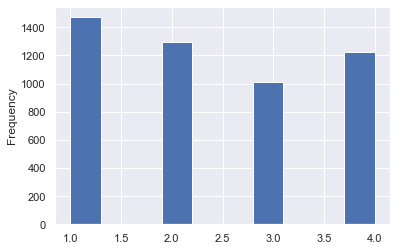

In [225]:
df_t.Family.plot.hist()

<AxesSubplot:>

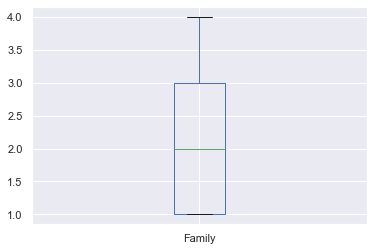

In [226]:
df_t.Family.plot.box()

- No outlier detected for Family 

<AxesSubplot:ylabel='Frequency'>

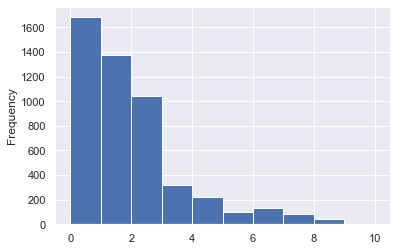

In [227]:
df_t.CCAvg.plot.hist()

<AxesSubplot:>

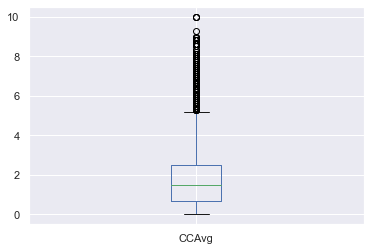

In [228]:
df_t.CCAvg.plot.box()

- Outlier detected in credit card usage as most of our customers don't have credit card or did not spend on credit card, we are seen those who spent much as outliers 

<AxesSubplot:ylabel='Frequency'>

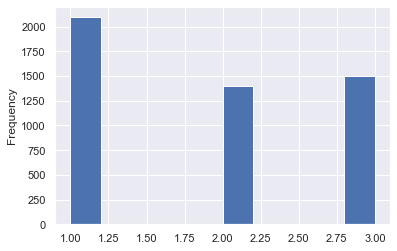

In [229]:
df_t.Education.plot.hist()

<AxesSubplot:>

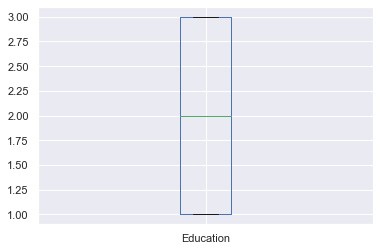

In [230]:
df_t.Education.plot.box()

- No outlier detected with education 

<AxesSubplot:ylabel='Frequency'>

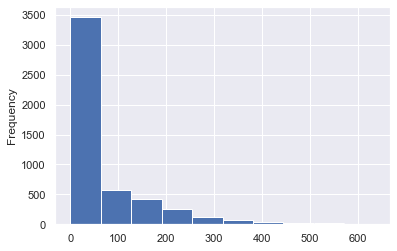

In [231]:
df_t.Mortgage.plot.hist()

<AxesSubplot:>

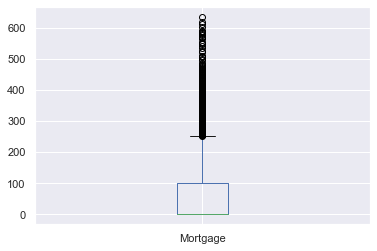

In [232]:
df_t.Mortgage.plot.box()

- Outliers detected in customers with mortgage, same thing here also most of the customers dont have morgage loan. 

In [233]:

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) 
    plt.show() # show the plot

/Users/dawit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


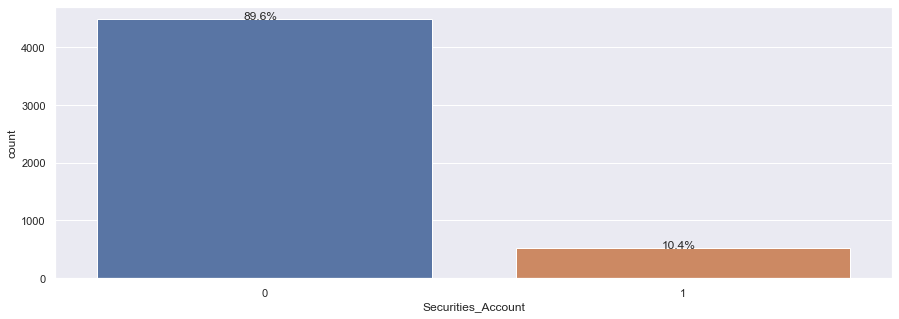

In [234]:

plt.figure(figsize=(15,5))
ax = sns.countplot(df_t.Securities_Account)
perc_on_bar(ax,df_t.Securities_Account)

- 89.6 % of the customers don't have securities account 

/Users/dawit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


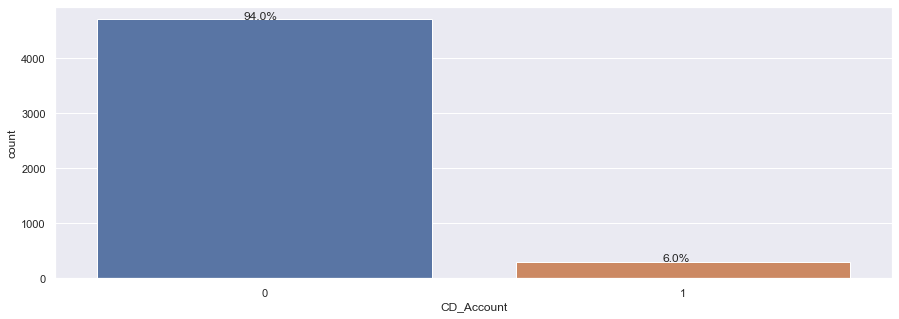

In [235]:

plt.figure(figsize=(15,5))
ax = sns.countplot(df_t.CD_Account)
perc_on_bar(ax,df_t.CD_Account)

- 94 % of the customers don't have CD_Account

/Users/dawit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


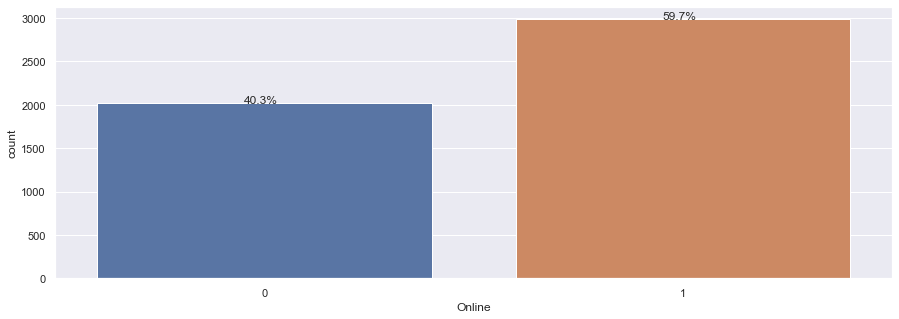

In [236]:

plt.figure(figsize=(15,5))
ax = sns.countplot(df_t.Online)
perc_on_bar(ax,df_t.Online)

- 59.7 % of our customers use online banking 

/Users/dawit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


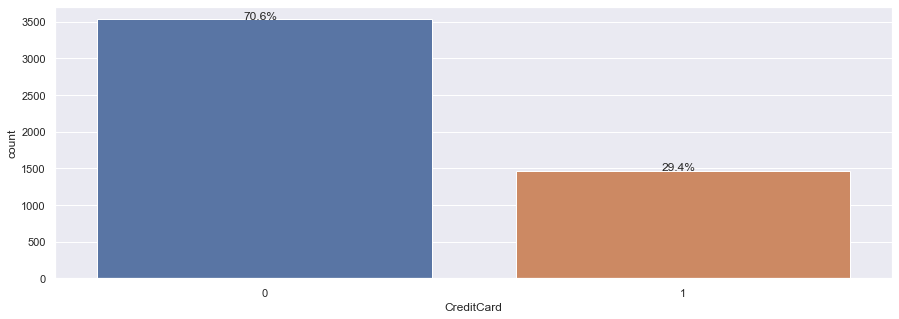

In [237]:

plt.figure(figsize=(15,5))
ax = sns.countplot(df_t.CreditCard)
perc_on_bar(ax,df_t.CreditCard)

- 70.6 % of our customers don't have credit card

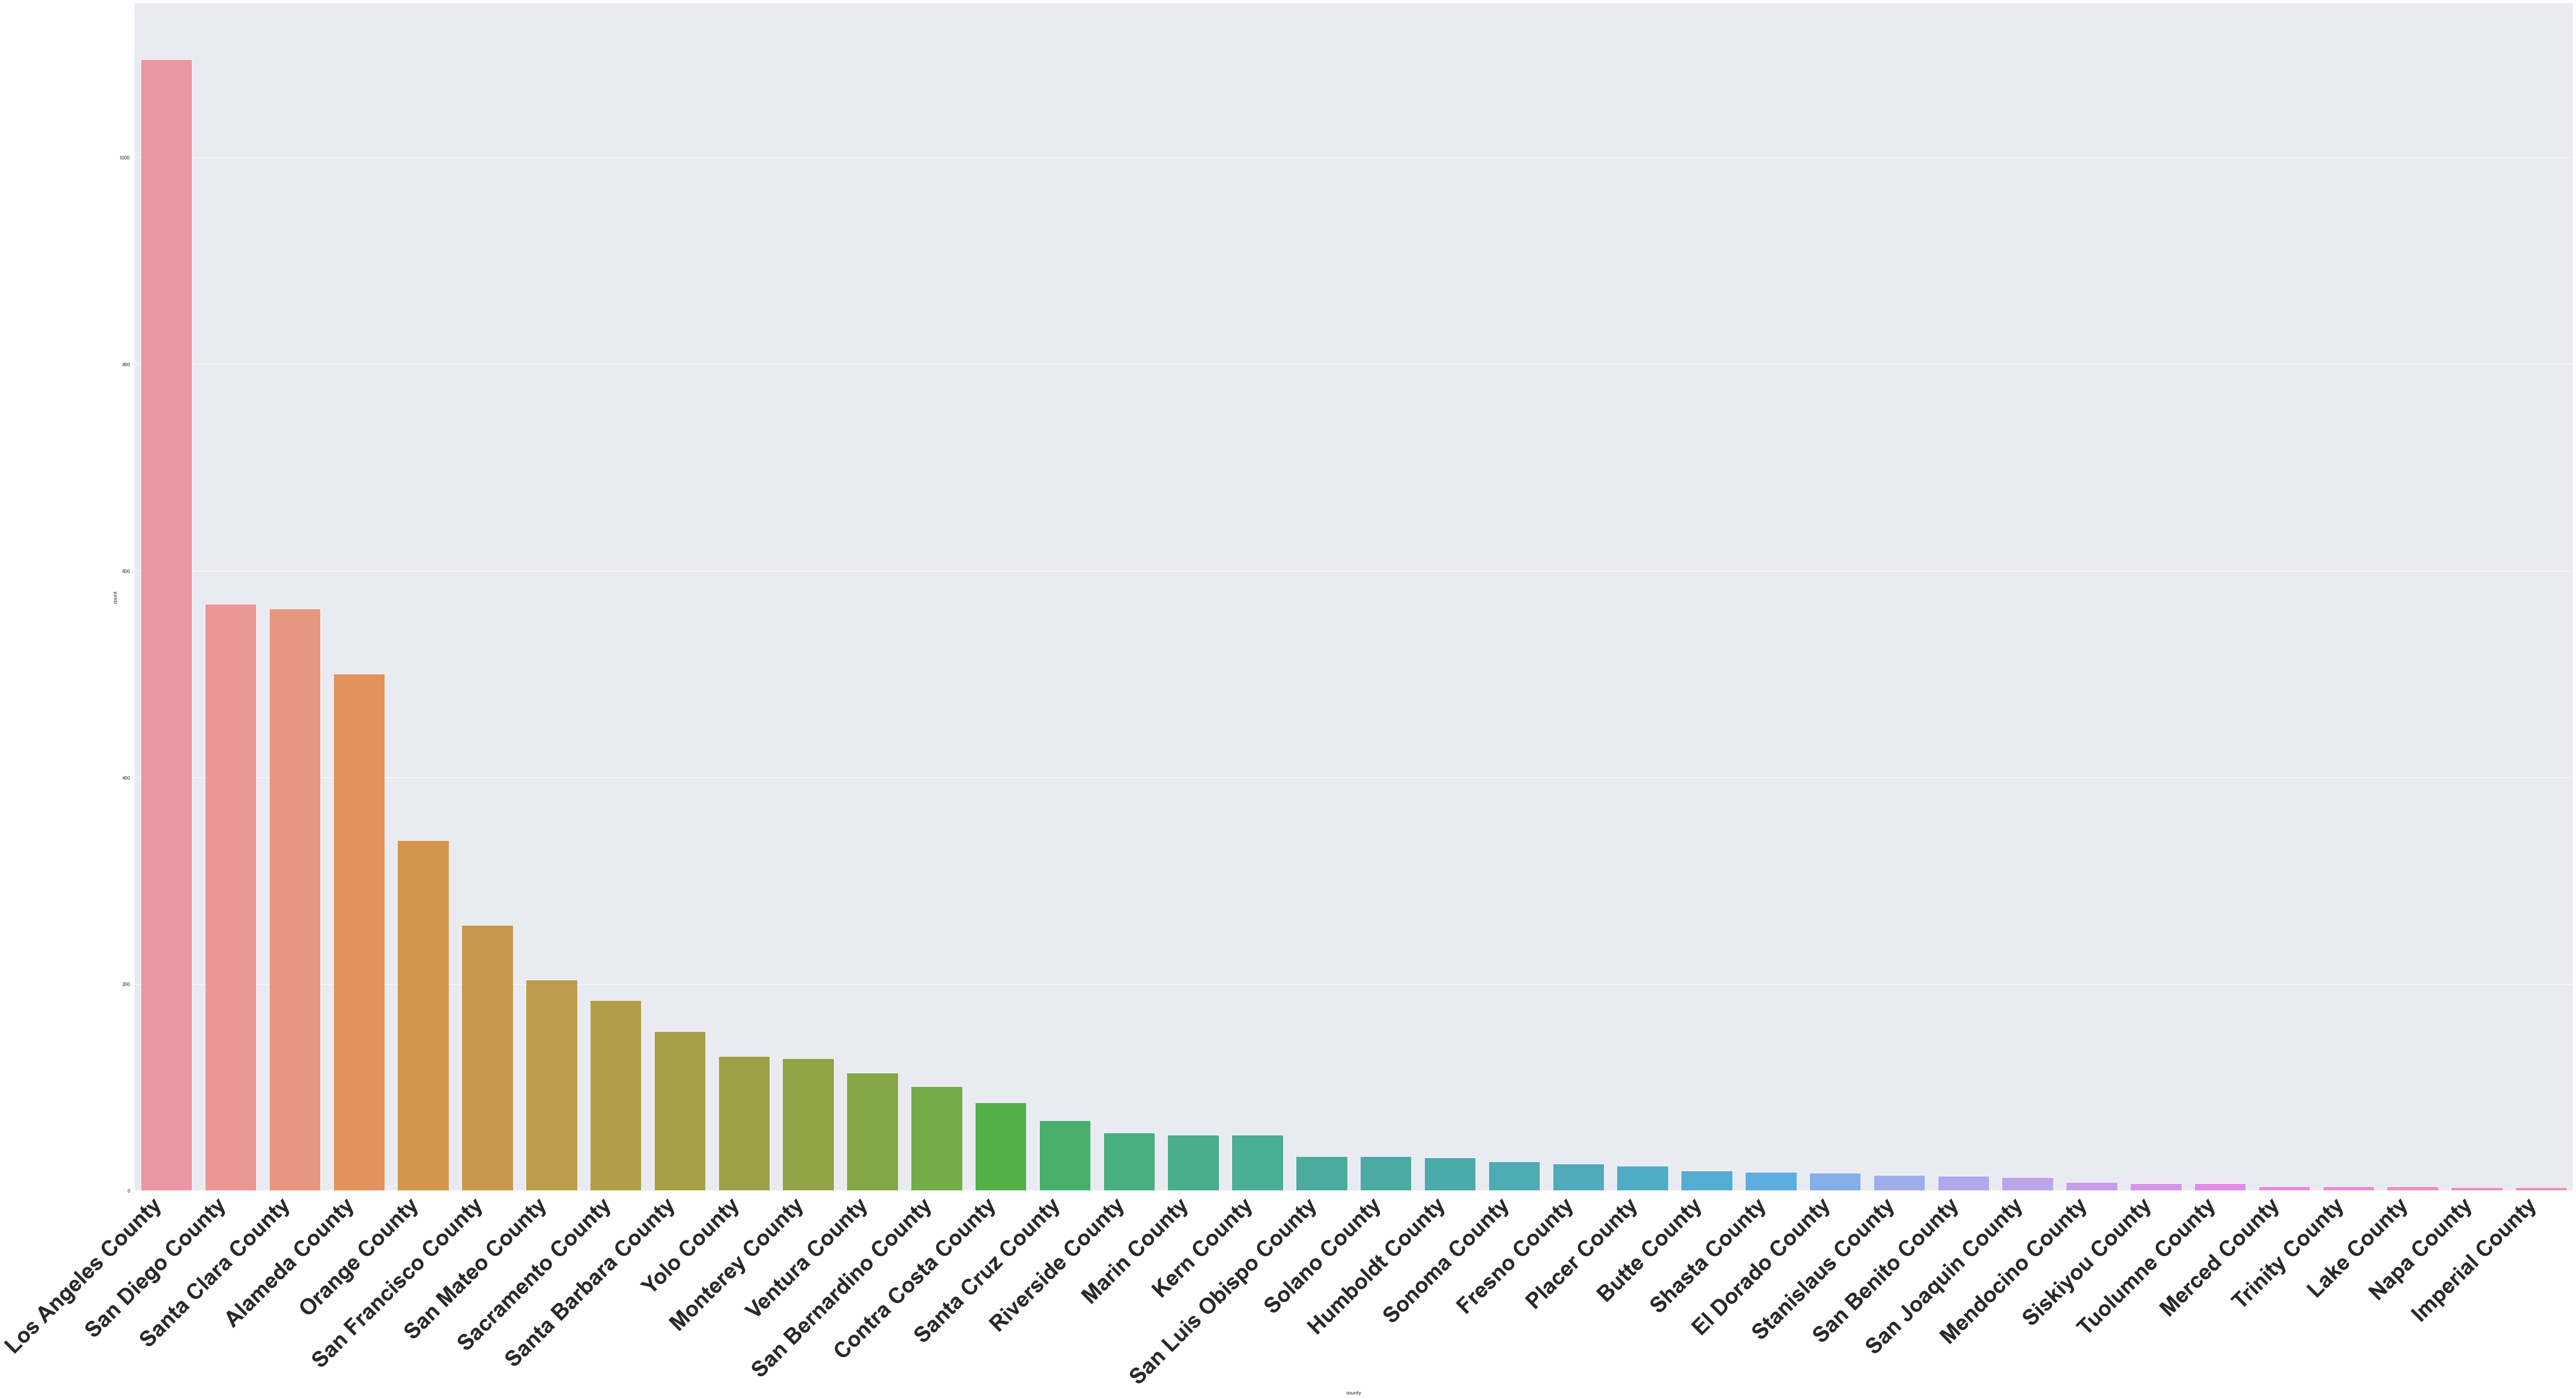

In [238]:
plt.figure(figsize=(100,50))
ax = sns.countplot(
    data=df_t,
    x='county',
    order = df_t['county'].value_counts().index
)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='bold',
    fontsize='50'
    
)
None 

- We have more number of customers from Los Angeles county.

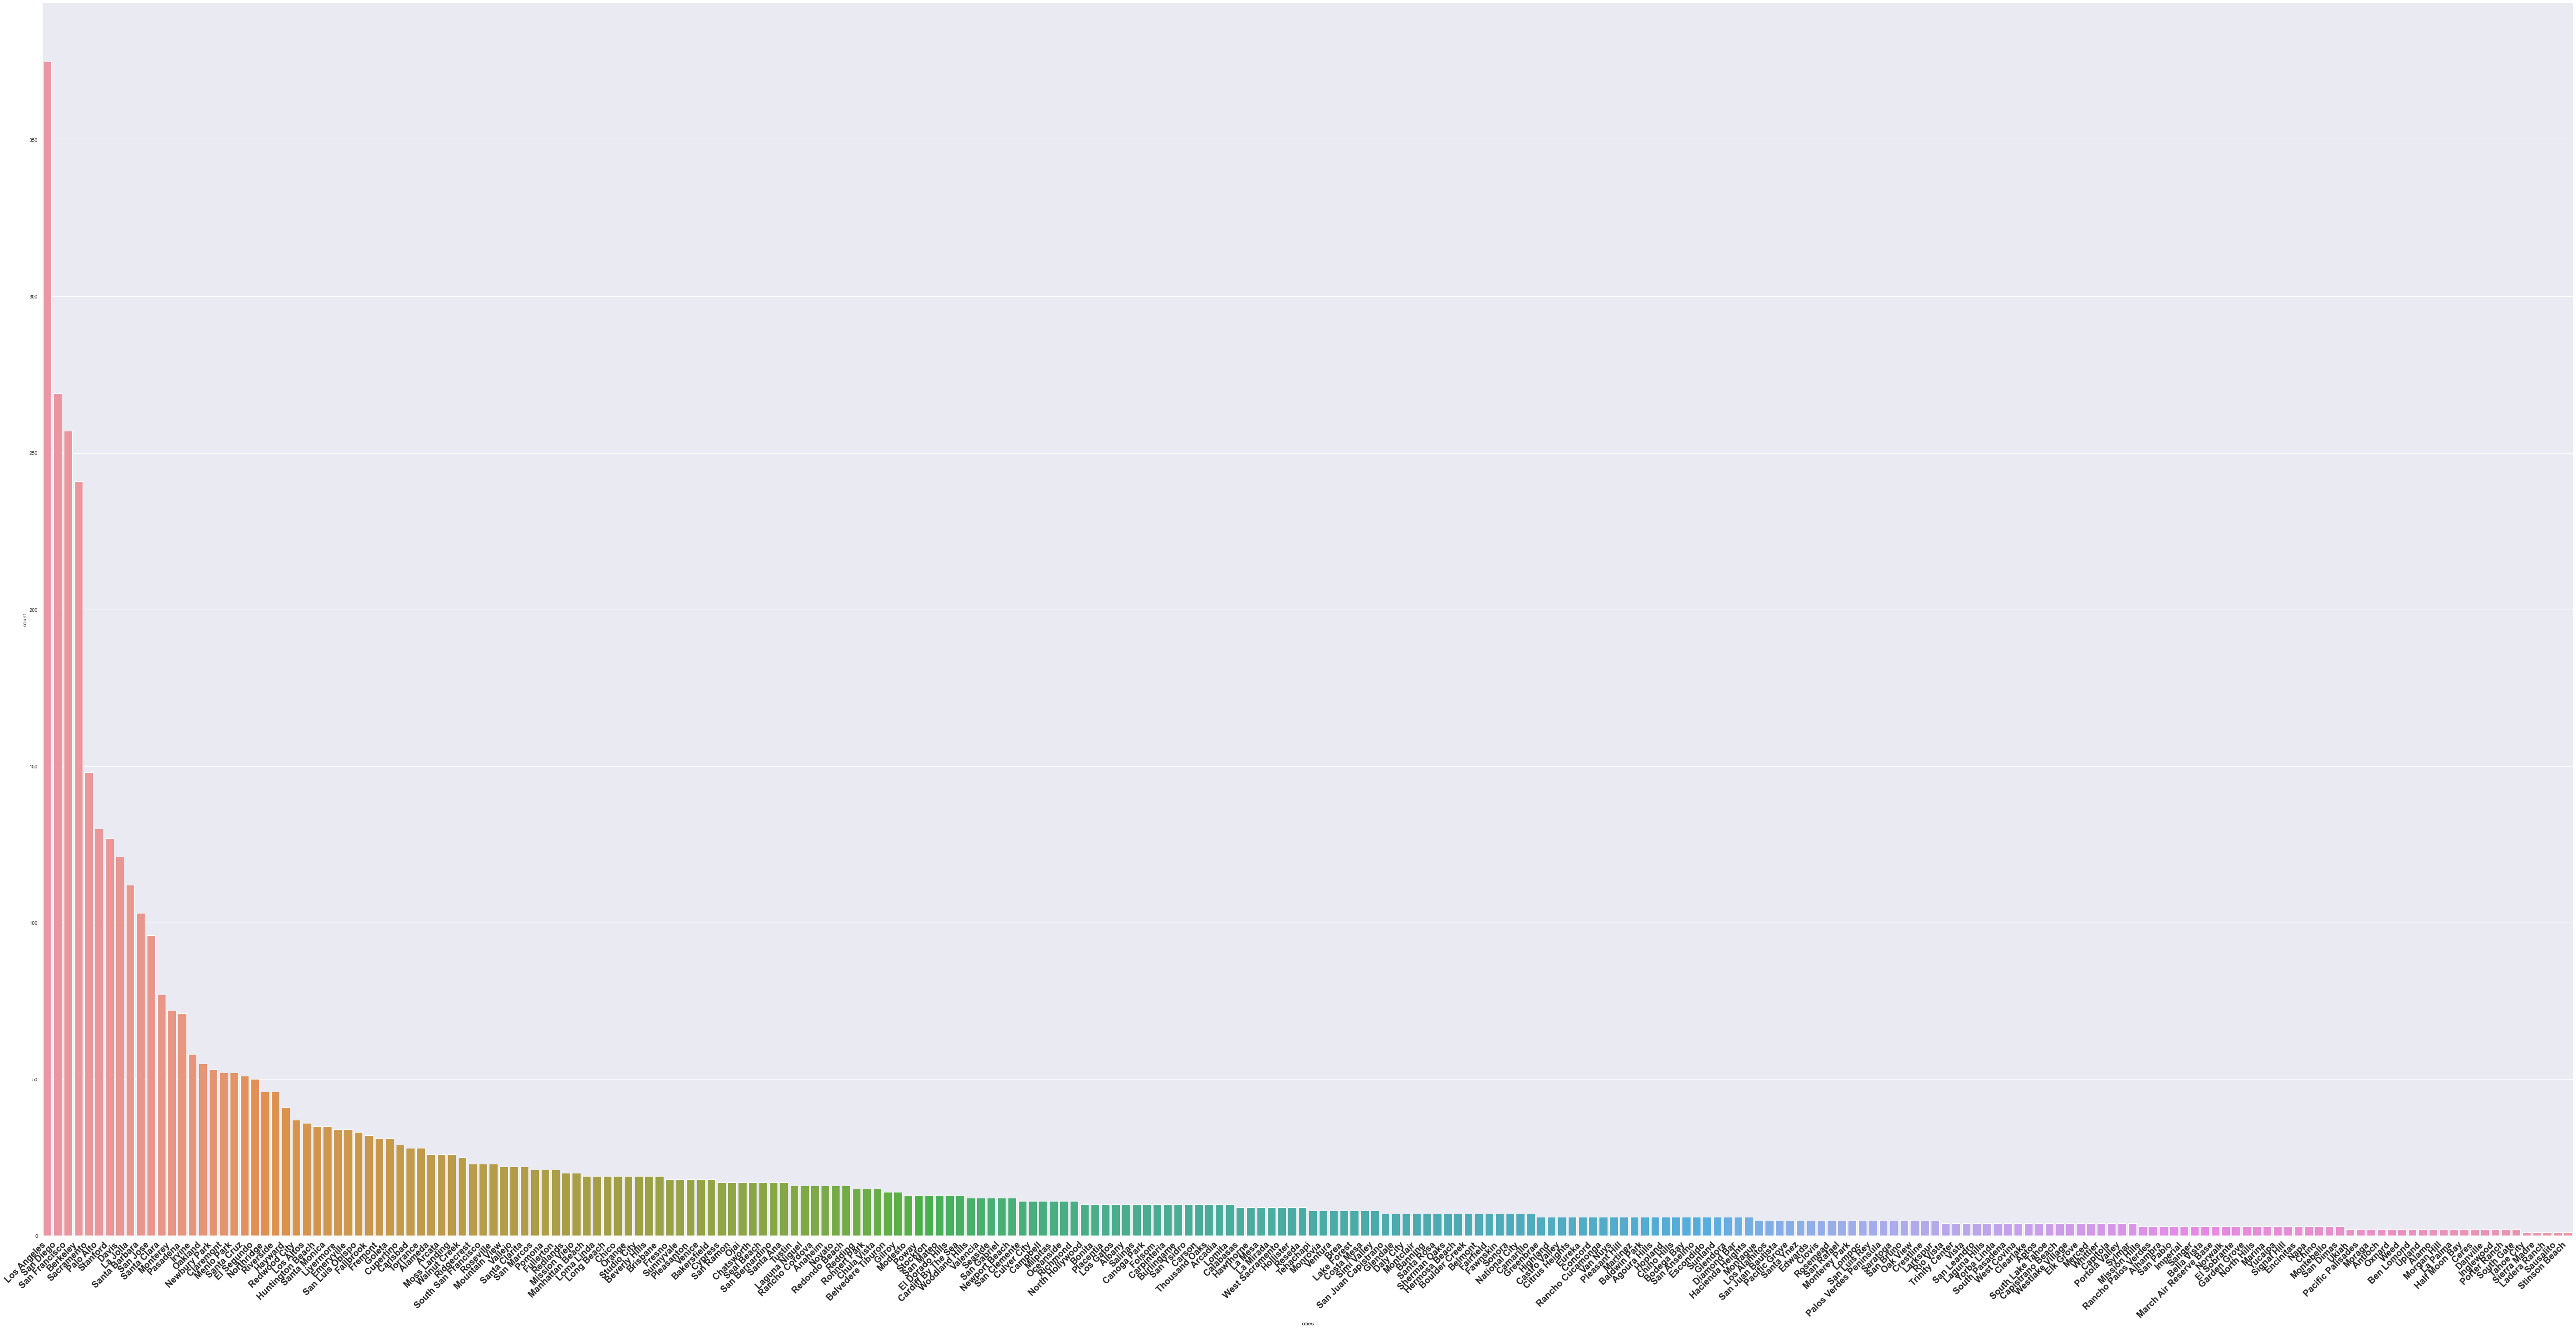

In [240]:
plt.figure(figsize=(100,50))
ax = sns.countplot(
    data=df_t,
    x='cities',
    order = df_t['cities'].value_counts().index
)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='bold',
    fontsize='20'
    
)
None 


- Same as county plot Los Angeles city got higher number of customers in AllLife bank

/Users/dawit/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


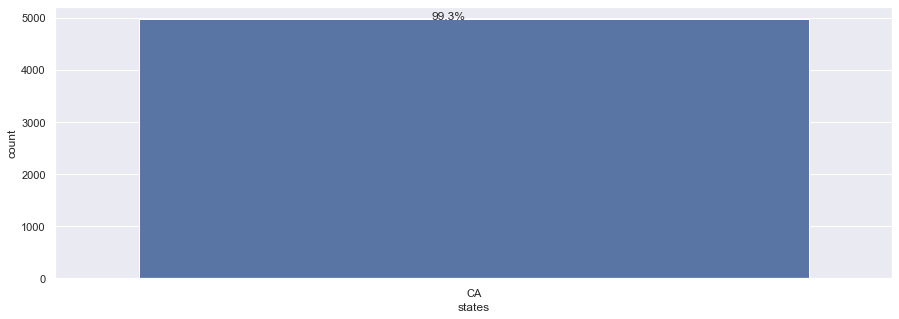

In [241]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df_t.states)
perc_on_bar(ax,df_t.states)

- All our customers are from state of California 

# Bivariant Analysis

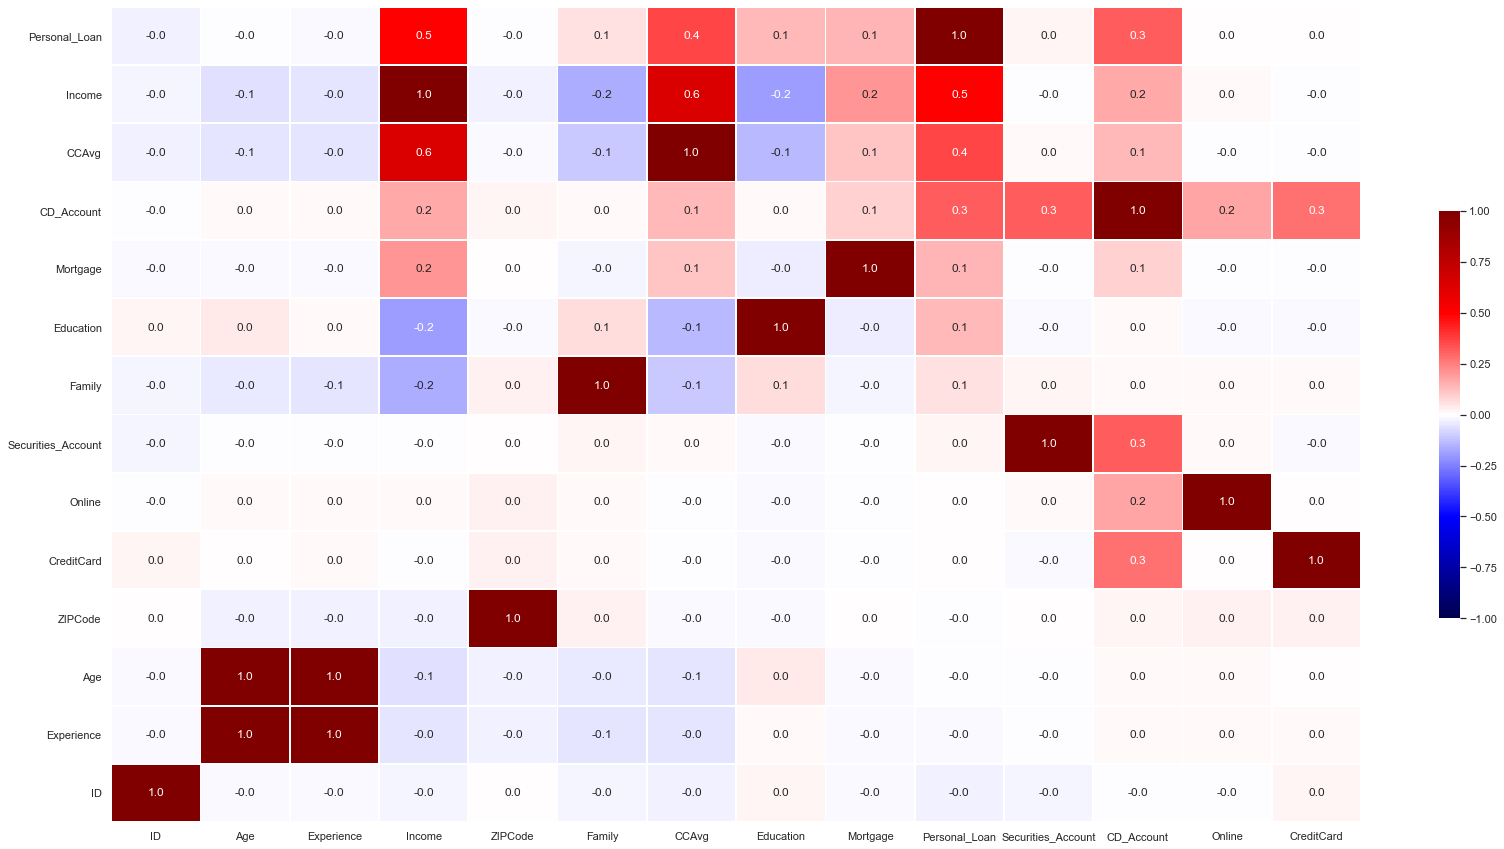

In [242]:
corr = df_t.corr().sort_values(by=['Personal_Loan'],ascending=False) # sorting correlations w.r.t price   
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

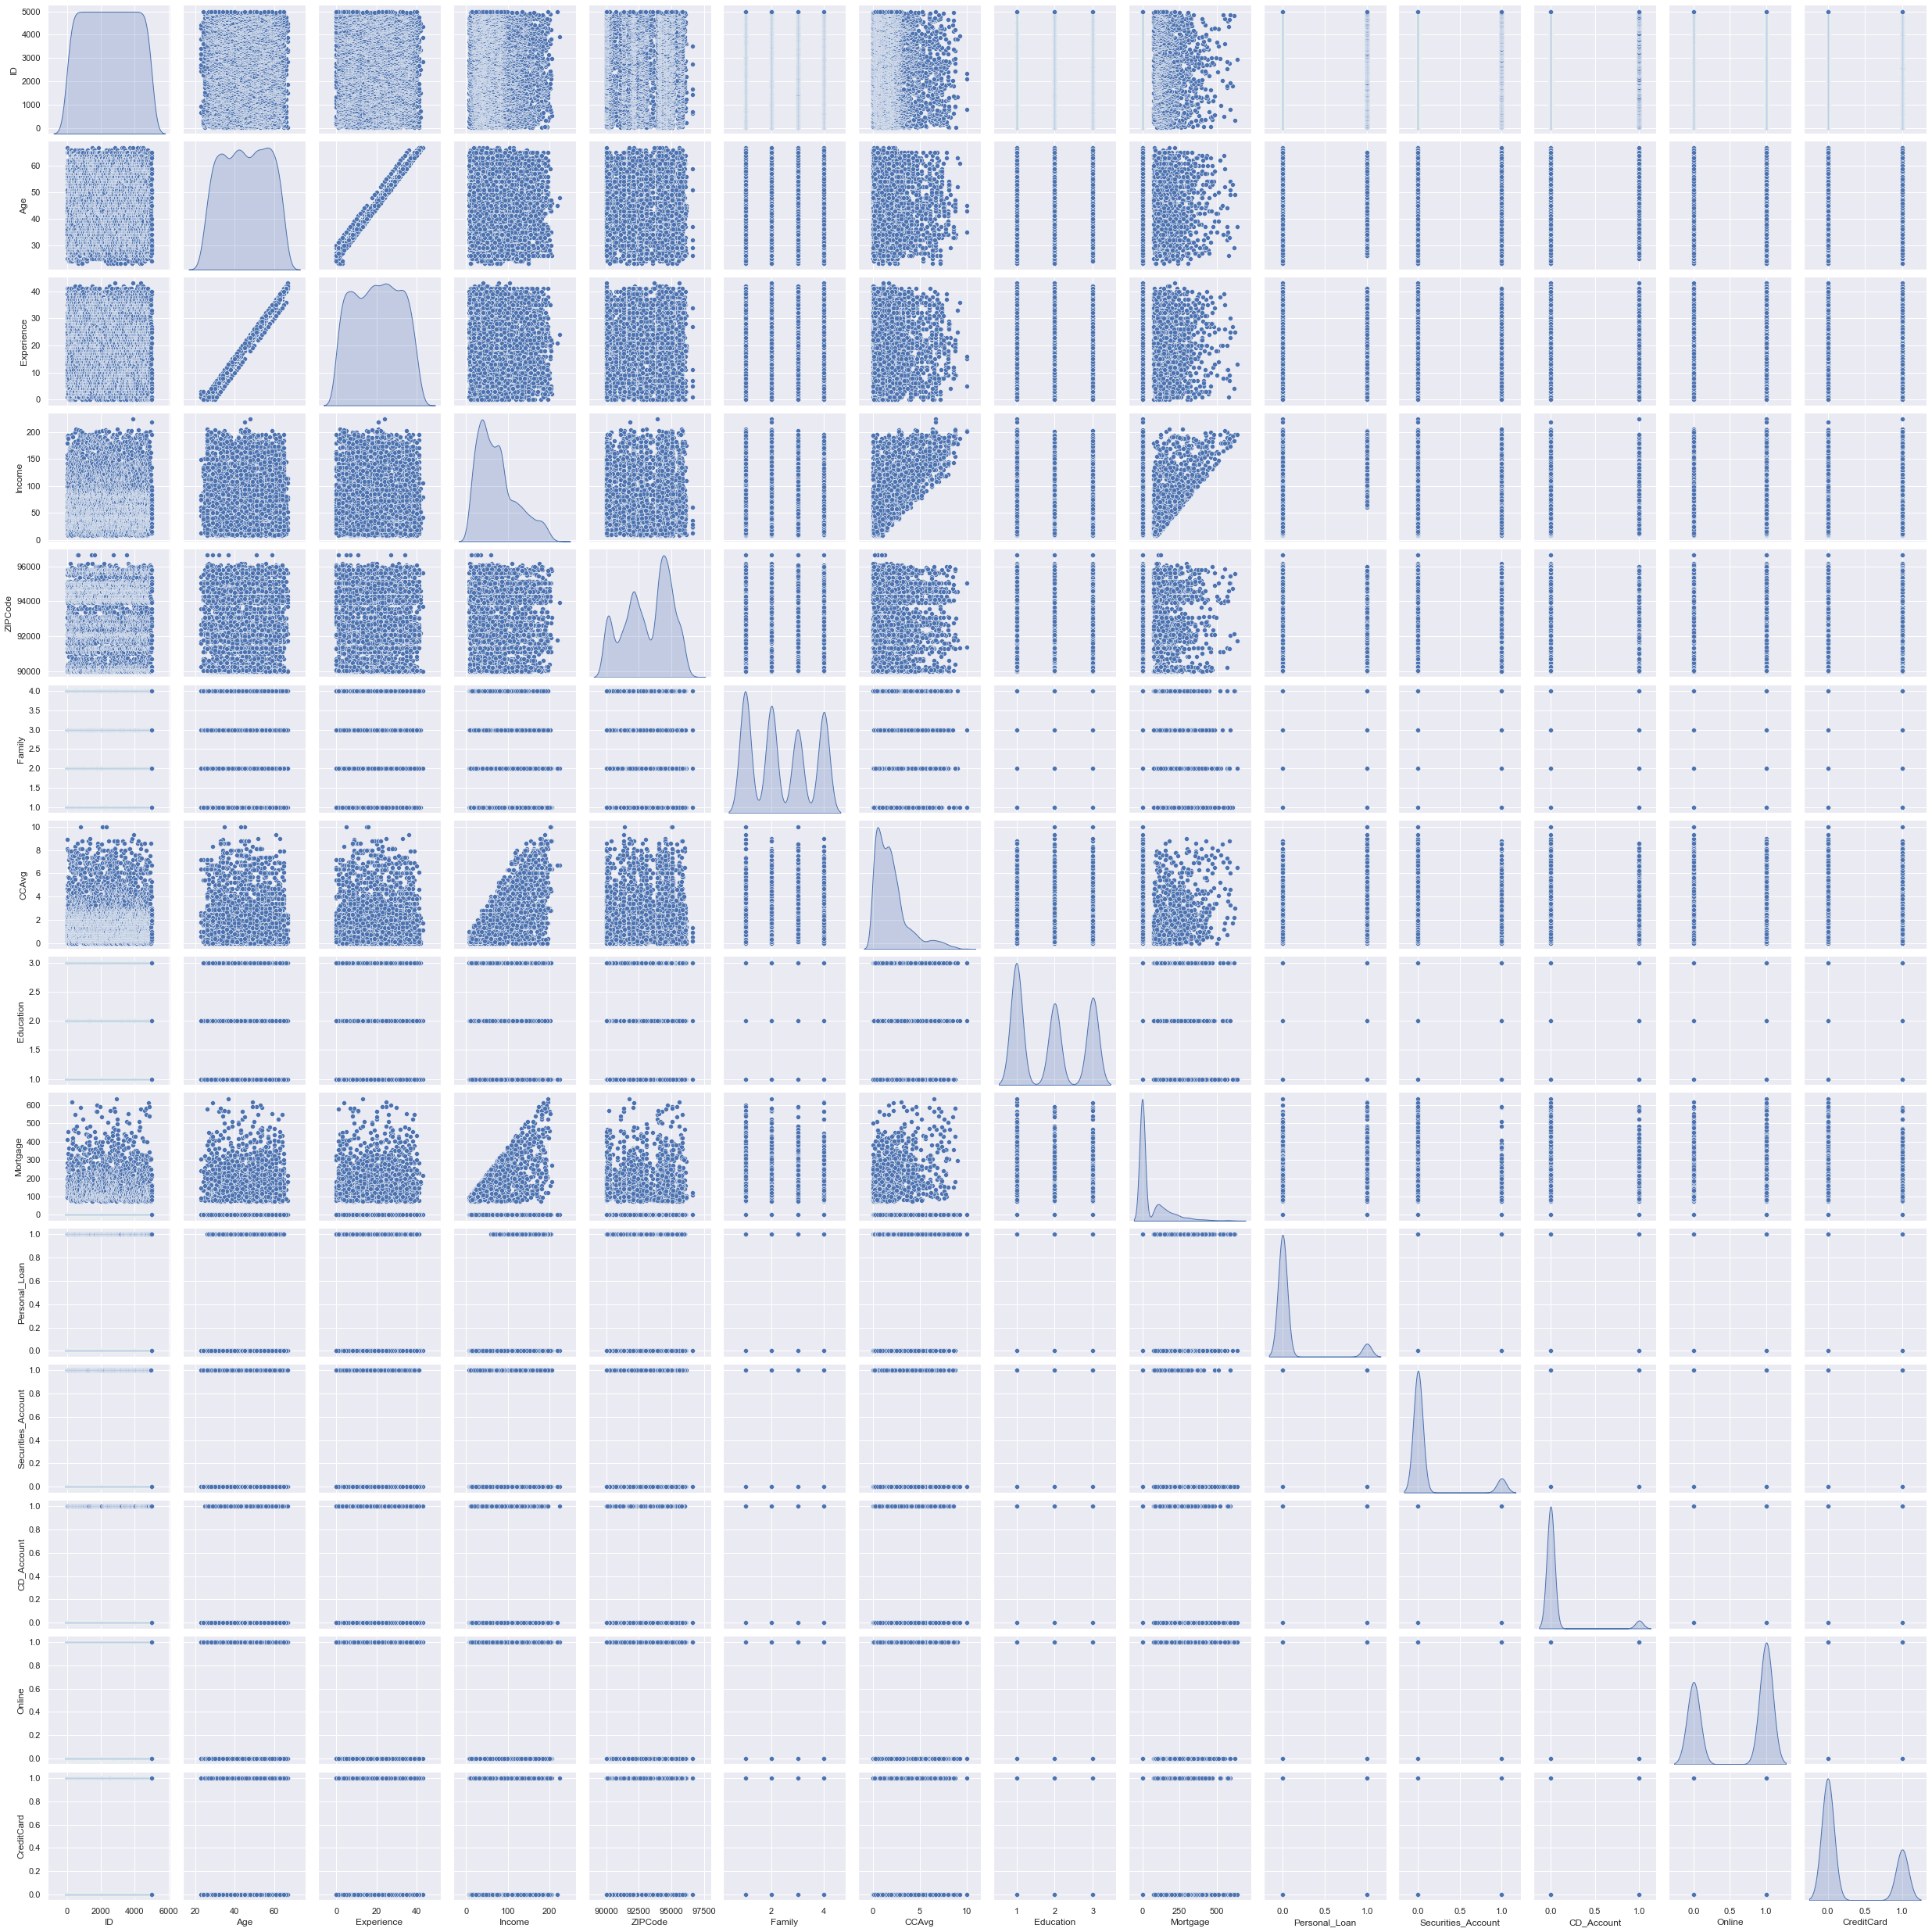

In [243]:
sns.pairplot(df_t, diag_kind='kde')

- All our features don't have high correlation with personal loan our target variable, Income got the higher correlation than other feratures but most doesn't have any correlation with personal loan.

In [244]:
df_t.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

          cities states                county  
0       Pasadena     CA    Los Angeles County  
1    Los Angeles     CA    Los Angeles County  
2       Berkeley     CA        Alameda County  
3  San Francisco     CA  San Francisco County  
4     Northridge     CA    Los Angeles County

In [245]:
def stacked_plot(x):
    
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df_t['Personal_Loan'],margins=True)
    
    ## visualising the cross tab
    tab = pd.crosstab(x,df_t['Personal_Loan'],normalize='index')
    plt.figure(figsize=(200,50))
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.xticks(rotation=45)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

<Figure size 14400x3600 with 0 Axes>

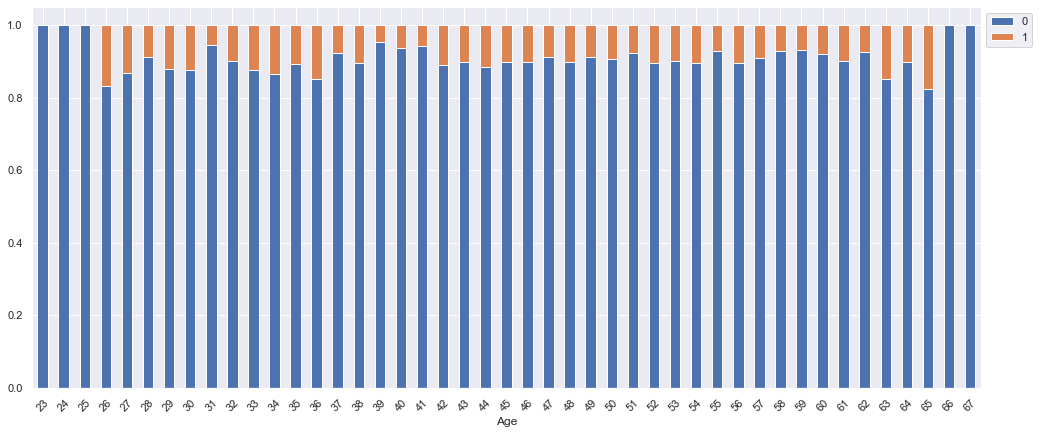

In [246]:
stacked_plot(df_t['Age'])

- we have customers who got accepted loan in all ages from 26 to 65

<Figure size 14400x3600 with 0 Axes>

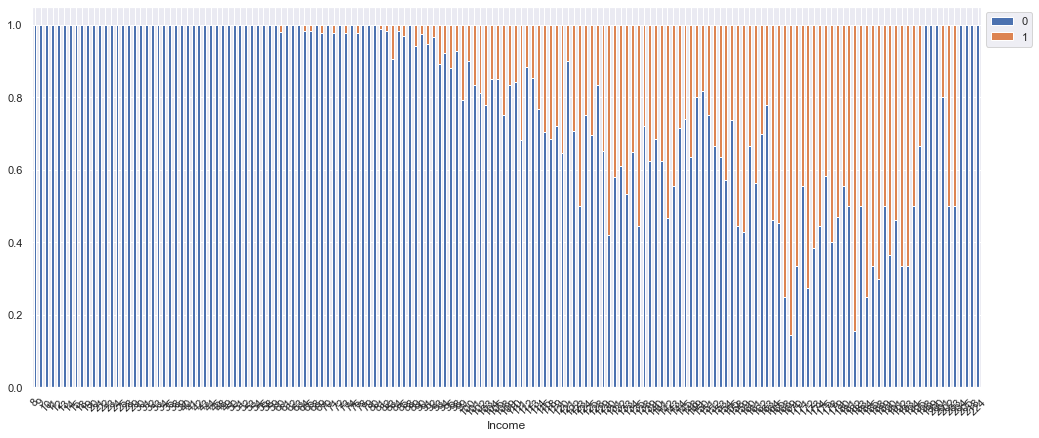

In [247]:
stacked_plot(df_t['Income'])

- The numbers are kind of difficult to see, but we can get some pattern in this plot that higher income customers have mostly accepted personal loan. which kind of make sense.

<Figure size 14400x3600 with 0 Axes>

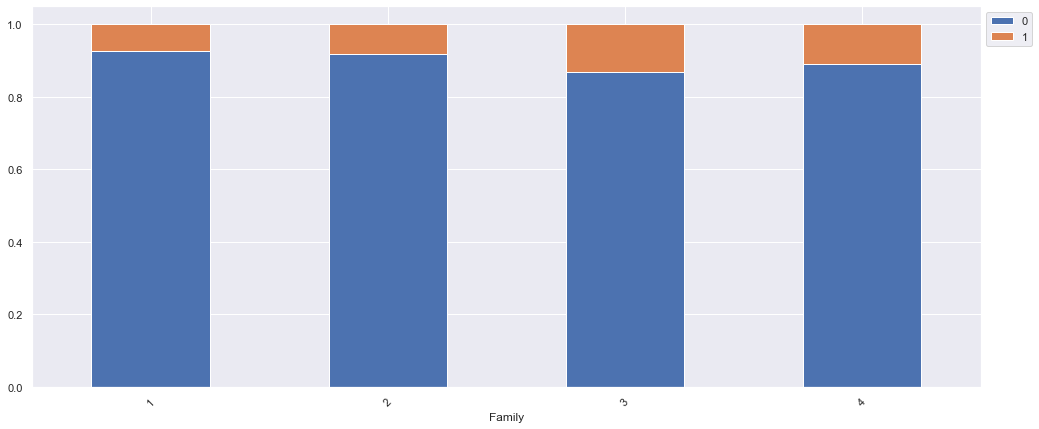

In [248]:
stacked_plot(df_t['Family'])

- we have acceptance in all size of family with most of them being family of 3 and 4.

<Figure size 14400x3600 with 0 Axes>

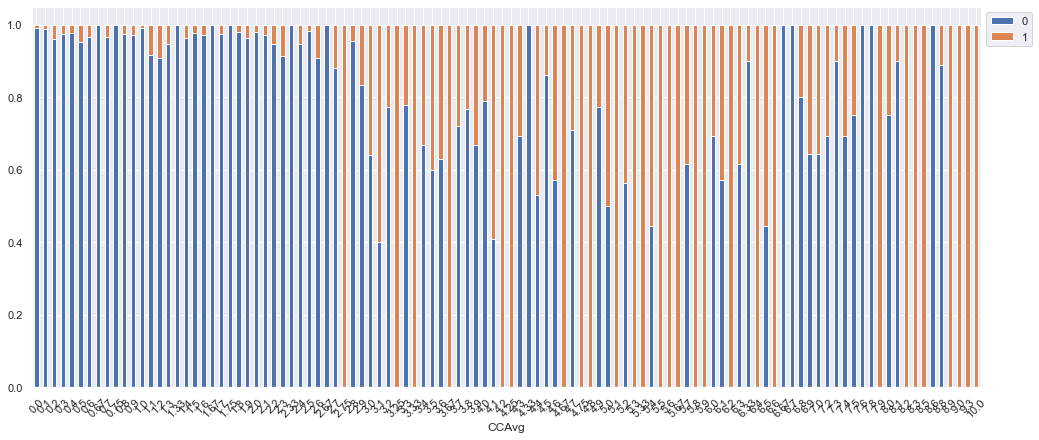

In [249]:
stacked_plot(df_t['CCAvg'])

- Customers who spend more in their credit have higher acceptance of personal loan.

<Figure size 14400x3600 with 0 Axes>

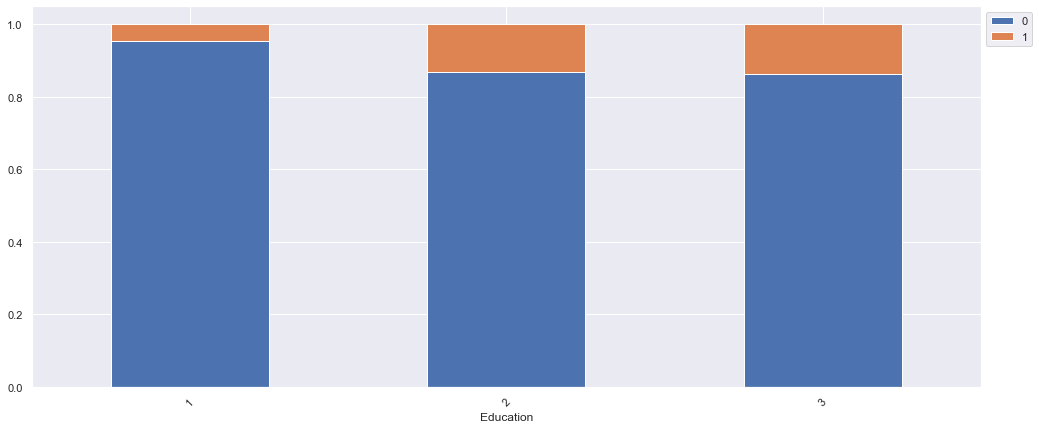

In [250]:
stacked_plot(df_t['Education'])

- Higher education level customers have higher acceptance of loan 

<Figure size 14400x3600 with 0 Axes>

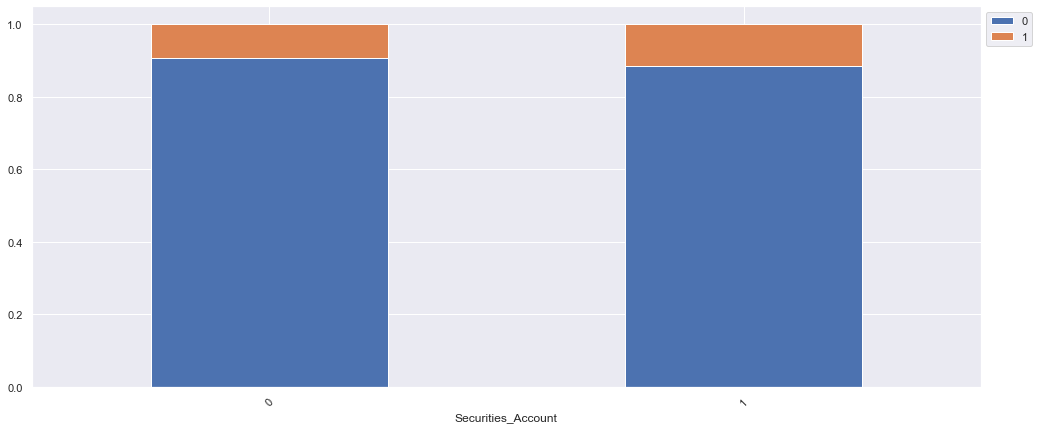

In [251]:
stacked_plot(df_t['Securities_Account'])

- customers with security account have higher acceptance rate.

<Figure size 14400x3600 with 0 Axes>

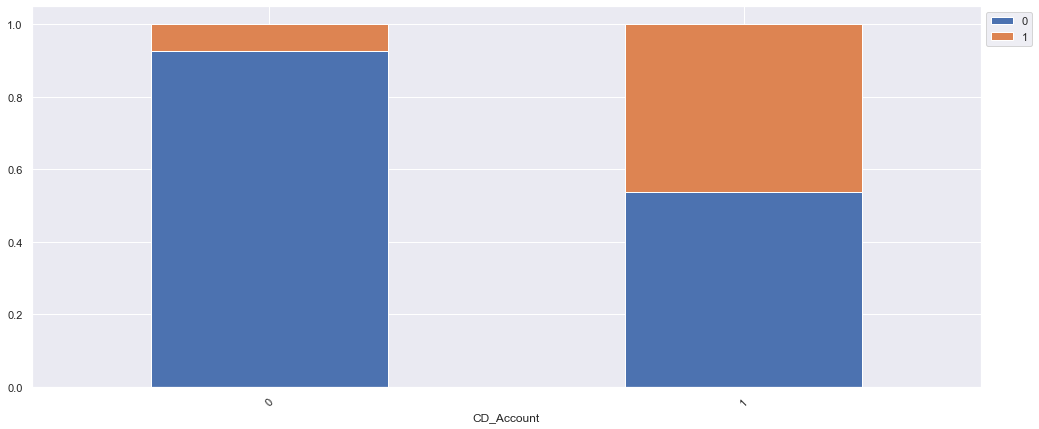

In [252]:
stacked_plot(df_t['CD_Account'])

- customers with cd account also have higher acceptance rate 

<Figure size 14400x3600 with 0 Axes>

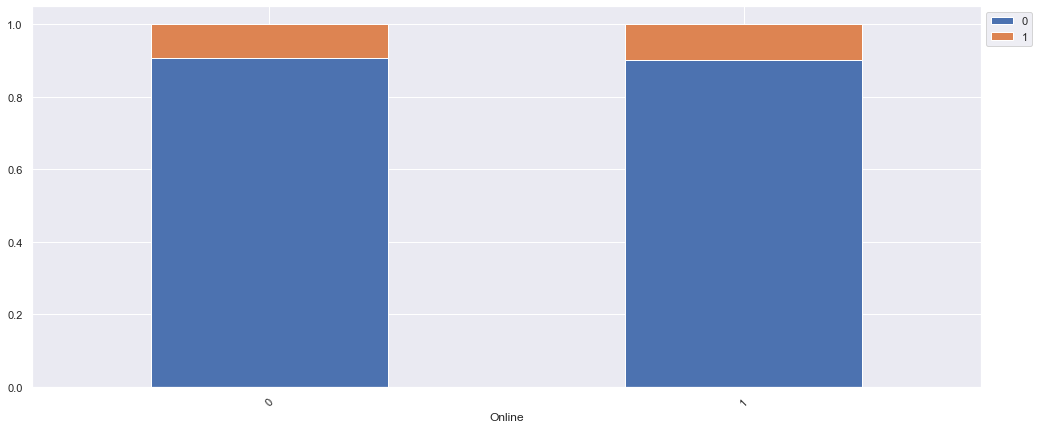

In [253]:
stacked_plot(df_t['Online'])

- Onlie usage looks like doesn't have an effect on acceptance of personal loan

<Figure size 14400x3600 with 0 Axes>

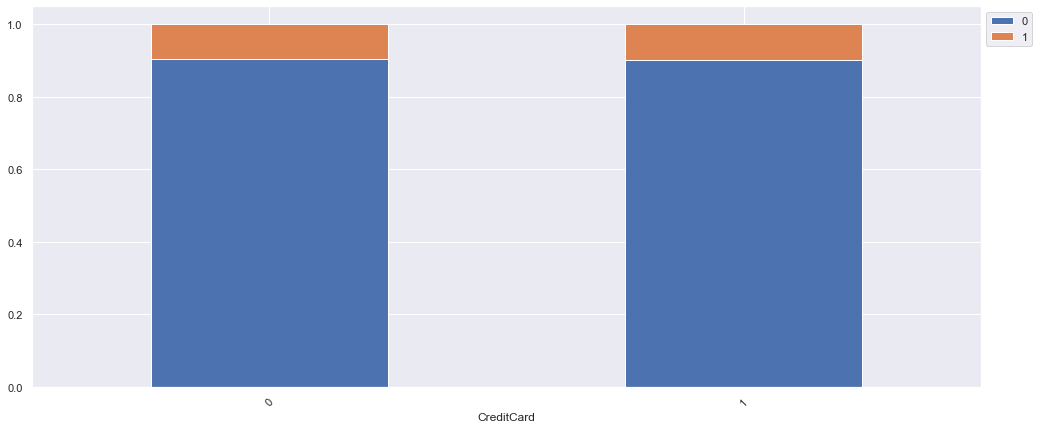

In [254]:
stacked_plot(df_t['CreditCard'])

- Same for credit card holder or not have no effect on personal loan

<Figure size 14400x3600 with 0 Axes>

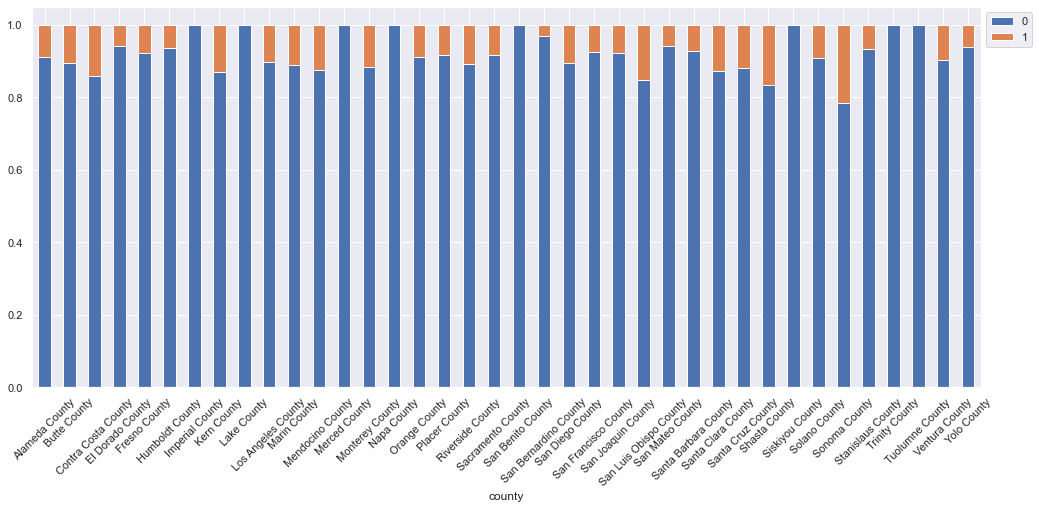

In [255]:
stacked_plot(df_t['county'])

- customers living in Solano county have higher acceptance number than another counties 

## Logistic Regression Model Building 

- For Logistic regression we need to treat outliers first as LR is sensetive to outliers 

## Treat Outliers 

- Treating out liner by calculating zscore and puting under the range of -3 and 3 for those out of this range

In [260]:
from scipy import stats

df_l['Income'] =df_l['Income'][np.abs(df_l.Income-df_l.Income.mean()) <= (3*df_l.Income.std())]
df_l['CCAvg'] =df_l['CCAvg'][np.abs(df_l.CCAvg-df_l.CCAvg.mean()) <= (3*df_l.CCAvg.std())]
df_l['Mortgage'] =df_l['Mortgage'][np.abs(df_l.Mortgage-df_l.Mortgage.mean()) <= (3*df_l.Mortgage.std())]


In [261]:
df_l = df_l.dropna(axis = 0) 

In [262]:
df_l.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

## Check multicolinearity 

In [263]:
num_feature_set = df_l.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 3287.097462
ID                       1.002671
Age                     93.815333
Experience              93.725392
Income                   1.972675
ZIPCode                  1.004383
Family                   1.049995
CCAvg                    1.603352
Education                1.170541
Mortgage                 1.009210
Personal_Loan            1.590645
Securities_Account       1.148966
CD_Account               1.425349
Online                   1.041249
CreditCard               1.110471
dtype: float64



- We have age and experience who contains high multicolinearity
- So we will drop them 

In [264]:
df_l = df_l.drop(['Age','Experience'], axis = 1)

## Data preparation for logstic regression.

In [265]:
l_zipcode = df_l['ZIPCode']
search = SearchEngine(simple_zipcode=True)
cities = [search.by_zipcode(z).major_city for z in l_zipcode]
df_l['cities'] = cities
df_l['states'] = [search.by_zipcode(z).state for z in l_zipcode]
df_l['county'] =  [search.by_zipcode(z).county for z in l_zipcode]
dummy_data = pd.get_dummies(df_l, columns=['county'],drop_first=True)
dummy_data.head()
dummy_data = dummy_data.drop(['states','cities', 'ID', 'ZIPCode'],axis=1)
column_names = list(dummy_data.columns)
column_names.remove('Personal_Loan')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)
X = dummy_data.drop('Personal_Loan',axis=1)                                                 # Features
y = dummy_data['Personal_Loan'].astype('int64')
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)



['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'county_Butte County', 'county_Contra Costa County', 'county_El Dorado County', 'county_Fresno County', 'county_Humboldt County', 'county_Imperial County', 'county_Kern County', 'county_Lake County', 'county_Los Angeles County', 'county_Marin County', 'county_Mendocino County', 'county_Merced County', 'county_Monterey County', 'county_Napa County', 'county_Orange County', 'county_Placer County', 'county_Riverside County', 'county_Sacramento County', 'county_San Benito County', 'county_San Bernardino County', 'county_San Diego County', 'county_San Francisco County', 'county_San Joaquin County', 'county_San Luis Obispo County', 'county_San Mateo County', 'county_Santa Barbara County', 'county_Santa Clara County', 'county_Santa Cruz County', 'county_Shasta County', 'county_Siskiyou County', 'county_Solano County', 'county_Sonoma County', 'county_Stanislaus County', 'county_Tr

In [266]:
def get_metrics_score(model,train,test,train_y,test_y,algo, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((algo, train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores



/Users/dawit/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training set :  0.9567164179104478
Accuracy on test set :  0.947075208913649
Recall on training set :  0.6338028169014085
Recall on test set :  0.4878048780487805
Precision on training set :  0.8144796380090498
Precision on test set :  0.821917808219178
F1 on training set :  0.712871287128713
F1 on test set :  0.6122448979591837


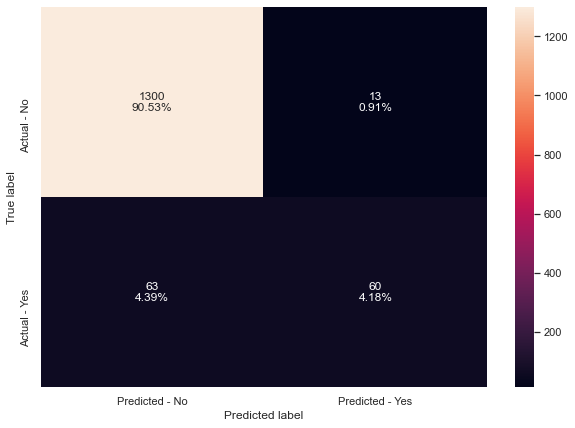

In [267]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train,y_train)
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,'default',flag=True)

# creating confusion matrix
make_confusion_matrix(lg,y_test)

- Our Accuracy is high but what we are interested is in recall as we want to maximize our loan acceptance we need to minimize our mistakes that we classify for those who accepted the offer as not accepted 
- we can see in out matrix that we have correctly classified those which say no with 90% of accuracy 
- We have predicted 4.3 % of our customers who says yes as no which we need to minimize this to meet the goal of out bank
- Another 4.18% we correctly identified that customers who say yes classified as yes.




In [268]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

Income    Family    CCAvg  Education  Mortgage  Securities_Account  \
coef  0.047052  0.490617  0.25121   1.164025  0.000805           -0.979972   

      CD_Account    Online  CreditCard  county_Butte County  ...  \
coef    4.826248 -0.955677   -1.450786             0.004826  ...   

      county_Santa Cruz County  county_Shasta County  county_Siskiyou County  \
coef                 -0.091188             -0.022268               -0.039266   

      county_Solano County  county_Sonoma County  county_Stanislaus County  \
coef             -0.067023             -0.080278                 -0.007303   

      county_Trinity County  county_Tuolumne County  county_Ventura County  \
coef              -0.038274               -0.044322              -0.371113   

      county_Yolo County  
coef           -0.604536  

[1 rows x 46 columns]

- Increase in income, Family, ccAvg, education, mortgage, or cd account will positively impact our model meaning the chance of a customer accepting the offer of loan will be high
- Securities_Account, CreditCard, Online features will affect it negatively meaning, an increase in those fields will not make a customer convert top personal loan 

## Logistic regression Model Performance Improvement

- I am going to use presion and recall curve to find an optimal threshold.

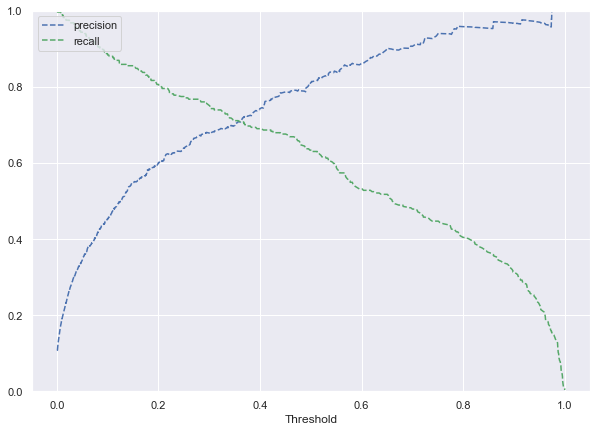

In [269]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

 - The best threshold is where recall and precision is high this time it looks like its the intesection of both graphs is the max we have with score of around 70. 
 - The value will be 0.3

In [270]:
optimal_threshold = 0.3

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.9486567164179105
Accuracy on test data: 0.9442896935933147
Recall on train data: 0.75
Recall on test data: 0.6260162601626016
Precision on train data: 0.678343949044586
Precision on test data: 0.6936936936936937
F1 Score on train data: 0.7123745819397993
F1 Score on test data: 0.6581196581196581
ROC-AUC Score on train data: 0.858529028049576
ROC-AUC Score on test data: 0.8000606814902879


- Recall have improved from 48 to 62 on a test data
- Looks like we have also improved overfitting 
- F1 score is also improved from 61 rto 65 

 ### Lets see if Sequential Feature Selector method improve it further 

In [271]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
df_l.head()

ID  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   1    49.0    91107       4    1.6          1       0.0              0   
1   2    34.0    90089       3    1.5          1       0.0              0   
2   3    11.0    94720       1    1.0          1       0.0              0   
3   4   100.0    94112       1    2.7          2       0.0              0   
4   5    45.0    91330       4    1.0          2       0.0              0   

   Securities_Account  CD_Account  Online  CreditCard         cities states  \
0                   1           0       0           0       Pasadena     CA   
1                   1           0       0           0    Los Angeles     CA   
2                   0           0       0           0       Berkeley     CA   
3                   0           0       0           0  San Francisco     CA   
4                   0           0       0           1     Northridge     CA   

                 county  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

In [272]:

X = df_l.drop(['Personal_Loan','ID','cities','states','ZIPCode'], axis=1)
Y = df_l['Personal_Loan']

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=1)

In [273]:
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [274]:
sfs = SFS(m, k_features=46, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    3.6s finished

[2021-05-14 23:46:49] Features: 1/46 -- score: 0.41706288687539245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished

[2021-05-14 23:46:49] Features: 2/46 -- score: 0.6042847217450392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.9s finished

[2021-05-14 23:46:50] Features: 3/46 -- score: 0.6546967089135763[Parallel

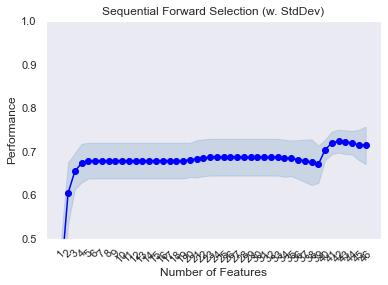

In [275]:

fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev')
plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

- As we see it increased slowly as the number of features increase then after the use of 44 features it start to decrease 
- So we will give it 44 features and test it again 

In [276]:
sfs = SFS(m, k_features=44, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.3s finished

[2021-05-14 23:47:53] Features: 1/44 -- score: 0.41706288687539245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished

[2021-05-14 23:47:54] Features: 2/44 -- score: 0.6042847217450392[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.9s finished

[2021-05-14 23:47:55] Features: 3/44 -- score: 0.6546967089135763[Parallel

- Let's find out the important features  

In [277]:
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [278]:
X_train.columns[feat_cols]

Index(['Income', 'Family', 'CCAvg', 'Education', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'county_Butte County',
       'county_Contra Costa County', 'county_El Dorado County',
       'county_Fresno County', 'county_Humboldt County',
       'county_Imperial County', 'county_Kern County', 'county_Lake County',
       'county_Los Angeles County', 'county_Marin County',
       'county_Mendocino County', 'county_Merced County',
       'county_Monterey County', 'county_Napa County', 'county_Orange County',
       'county_Placer County', 'county_Riverside County',
       'county_Sacramento County', 'county_San Benito County',
       'county_San Bernardino County', 'county_San Diego County',
       'county_San Francisco County', 'county_San Joaquin County',
       'county_San Luis Obispo County', 'county_San Mateo County',
       'county_Santa Barbara County', 'county_Santa Cruz County',
       'county_Shasta County', 'county_Siskiyou County',
       'county_Solano C

In [279]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [280]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

In [281]:
scores_LR = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,'Sequential_Feature_Selector',flag=True)

Accuracy on training set :  0.9605970149253731
Accuracy on test set :  0.9477715877437326
Recall on training set :  0.6725352112676056
Recall on test set :  0.5284552845528455
Precision on training set :  0.8304347826086956
Precision on test set :  0.7926829268292683
F1 on training set :  0.7431906614785992
F1 on test set :  0.6341463414634146


In [283]:
scores_SFS = get_metrics_score(logreg,X_train_final,X_test_final,y_train,y_test,'Sequential_Feature_Selector',flag=True)
scores_lg = get_metrics_score(lg,X_train,X_test,y_train,y_test,'lg',flag=True)


df = pd.DataFrame([scores_SFS,scores_lg], columns=['Algo', 'Acc_train','Acc_test' ,'Recall_train','Recall_test','Pres_train','Pres_test', 'F1_Train','F1_Test'])
df.head()

Accuracy on training set :  0.9605970149253731
Accuracy on test set :  0.9477715877437326
Recall on training set :  0.6725352112676056
Recall on test set :  0.5284552845528455
Precision on training set :  0.8304347826086956
Precision on test set :  0.7926829268292683
F1 on training set :  0.7431906614785992
F1 on test set :  0.6341463414634146
Accuracy on training set :  0.9567164179104478
Accuracy on test set :  0.947075208913649
Recall on training set :  0.6338028169014085
Recall on test set :  0.4878048780487805
Precision on training set :  0.8144796380090498
Precision on test set :  0.821917808219178
F1 on training set :  0.712871287128713
F1 on test set :  0.6122448979591837


Algo  Acc_train  Acc_test  Recall_train  \
0  Sequential_Feature_Selector   0.960597  0.947772      0.672535   
1                           lg   0.956716  0.947075      0.633803   

   Recall_test  Pres_train  Pres_test  F1_Train   F1_Test  
0     0.528455    0.830435   0.792683  0.743191  0.634146  
1     0.487805    0.814480   0.821918  0.712871  0.612245

- As we can see from the table above we had better performance with the treshold improvment, than using Sequential Feature Selector algorrithm.

# Decesion Tree Model building

In [256]:
df_t.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

          cities states                county  
0       Pasadena     CA    Los Angeles County  
1    Los Angeles     CA    Los Angeles County  
2       Berkeley     CA        Alameda County  
3  San Francisco     CA  San Francisco County  
4     Northridge     CA    Los Angeles County

# DT Data Preperation

- Most of our data is numeric so no need of pre processing to change it to numeric
- I will use county information as a grouping technique for zip code.
- I will creare encoding for the county.


In [257]:
dummy_data = pd.get_dummies(df_t, columns=['county'],drop_first=True)
dummy_data.head()
dummy_data = dummy_data.drop(['states','cities', 'ID', 'ZIPCode'],axis=1)


In [284]:
X = dummy_data.drop('Personal_Loan',axis=1)                                                 # Features
y = dummy_data['Personal_Loan'].astype('int64')


In [258]:
column_names = list(dummy_data.columns)
column_names.remove('Personal_Loan')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'county_Butte County', 'county_Contra Costa County', 'county_El Dorado County', 'county_Fresno County', 'county_Humboldt County', 'county_Imperial County', 'county_Kern County', 'county_Lake County', 'county_Los Angeles County', 'county_Marin County', 'county_Mendocino County', 'county_Merced County', 'county_Monterey County', 'county_Napa County', 'county_Orange County', 'county_Placer County', 'county_Riverside County', 'county_Sacramento County', 'county_San Benito County', 'county_San Bernardino County', 'county_San Diego County', 'county_San Francisco County', 'county_San Joaquin County', 'county_San Luis Obispo County', 'county_San Mateo County', 'county_Santa Barbara County', 'county_Santa Clara County', 'county_Santa Cruz County', 'county_Shasta County', 'county_Siskiyou County', 'county_Solano County', 'county_Sonoma County', 'county_Stanislau

In [286]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4786 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         4786 non-null   float64
 1   Family                         4786 non-null   int64  
 2   CCAvg                          4786 non-null   float64
 3   Education                      4786 non-null   int64  
 4   Mortgage                       4786 non-null   float64
 5   Personal_Loan                  4786 non-null   int64  
 6   Securities_Account             4786 non-null   int64  
 7   CD_Account                     4786 non-null   int64  
 8   Online                         4786 non-null   int64  
 9   CreditCard                     4786 non-null   int64  
 10  county_Butte County            4786 non-null   uint8  
 11  county_Contra Costa County     4786 non-null   uint8  
 12  county_El Dorado County        4786 non-null   u

In [285]:
X.head()

Income  Family  CCAvg  Education  Mortgage  Securities_Account  CD_Account  \
0    49.0       4    1.6          1       0.0                   1           0   
1    34.0       3    1.5          1       0.0                   1           0   
2    11.0       1    1.0          1       0.0                   0           0   
3   100.0       1    2.7          2       0.0                   0           0   
4    45.0       4    1.0          2       0.0                   0           0   

   Online  CreditCard  county_Butte County  ...  county_Santa Cruz County  \
0       0           0                    0  ...                         0   
1       0           0                    0  ...                         0   
2       0           0                    0  ...                         0   
3       0           0                    0  ...                         0   
4       0           1                    0  ...                         0   

   county_Shasta County  county_Siskiyou County  county_Solano County  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   county_Sonoma County  county_Stanislaus County  county_Trinity County  \
0                     0                         0                      0   
1                     0                         0                      0   
2                     0                         0                      0   
3                     0                         0                      0   
4                     0                         0                      0   

   county_Tuolumne County  county_Ventura County  county_Yolo County  
0                       0                      0                   0  
1                       0                      0                   0  
2                       0                      0                   0  
3                       0                      0                   0  
4                       0                      0                   0  

[5 rows x 46 columns]

In [287]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3350, 46) (1436, 46)


In [288]:
dt = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [289]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy on training set :  1.0
Accuracy on test set :  0.9777158774373259
Recall on training set :  1.0
Recall on test set :  0.8373983739837398
Precision on training set :  1.0
Precision on test set :  0.8956521739130435
F1 on training set :  1.0
F1 on test set :  0.8655462184873949


['default',
 1.0,
 0.9777158774373259,
 1.0,
 0.8373983739837398,
 1.0,
 0.8956521739130435,
 1.0,
 0.8655462184873949]

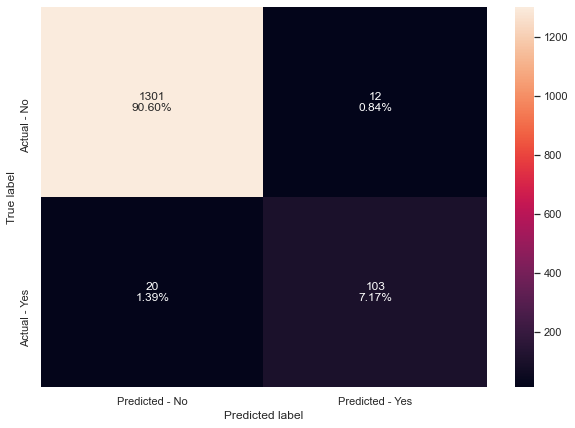

In [290]:
make_confusion_matrix(dt,y_test)
get_metrics_score(dt,X_train,X_test,y_train,y_test,'default',flag=True)

- From the metrics we can see that train and test F1 score and recall difference is a little bit high and the training accuracy is 100% meaning we have also explained the noise. This will lead us into model overfit.
- As a metric for this business we are interested in recall, we want to increase the level of loan acceptance, so we don't want to classify those who have actually accepted as not accepted(We want to minimize the number of False negatives).


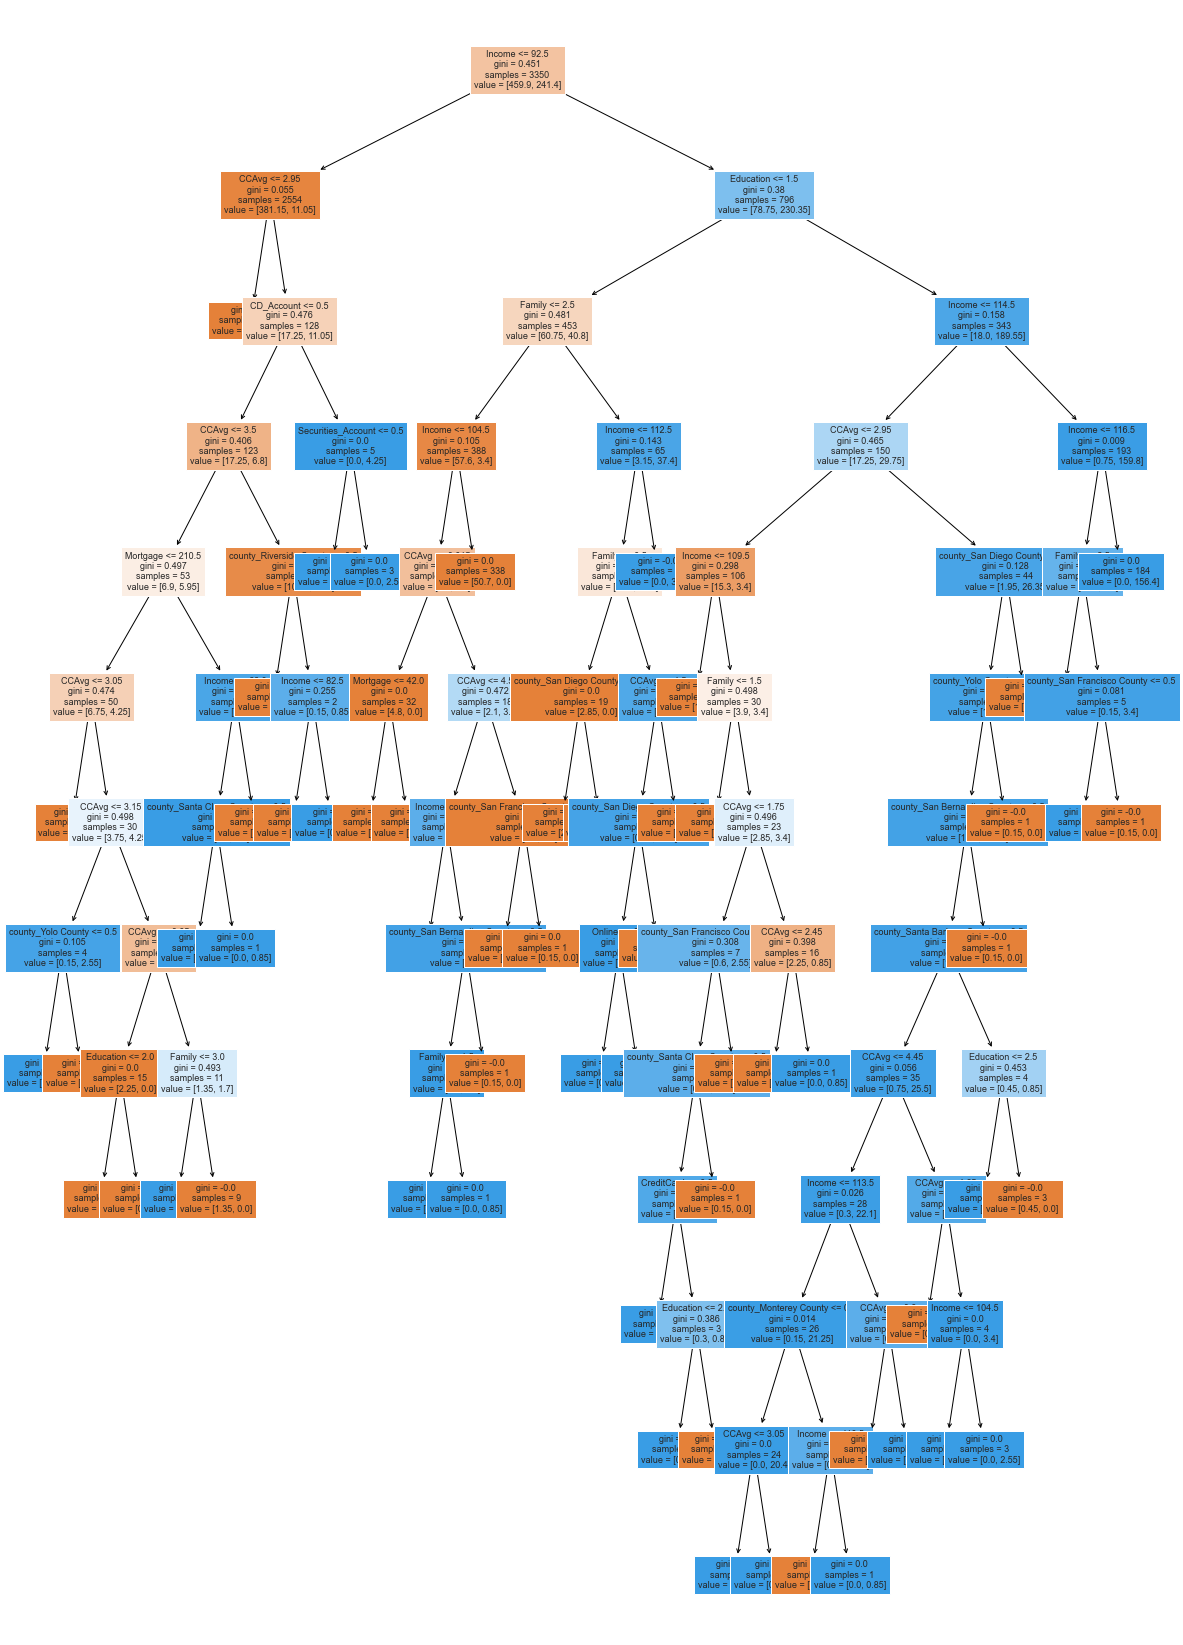

In [292]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dt,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

- As expected for 100 % training accuracy we have a very complex tree

# Important features in building the model

In [294]:
print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
Income                         6.187961e-01
Family                         1.321617e-01
Education                      1.159532e-01
CCAvg                          1.039419e-01
CD_Account                     1.173732e-02
county_Riverside County        4.156456e-03
county_San Diego County        3.399071e-03
Mortgage                       2.837225e-03
county_San Bernardino County   1.769590e-03
county_Yolo County             1.747699e-03
county_San Francisco County    1.559490e-03
county_Santa Barbara County    7.891637e-04
county_Santa Clara County      7.206239e-04
CreditCard                     2.948845e-04
county_Monterey County         1.354884e-04
Securities_Account             5.514093e-17
Online                         1.788354e-18
county_Solano County           0.000000e+00
county_Siskiyou County         0.000000e+00
county_Sonoma County           0.000000e+00
county_Santa Cruz County       0.000000e+00
county_Stanislaus County       0

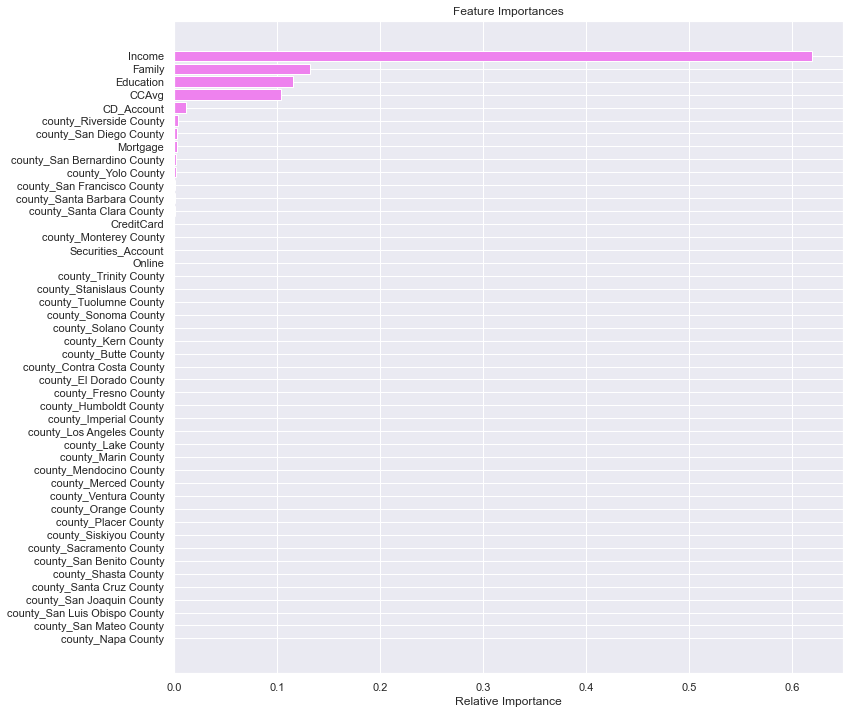

In [295]:
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


- We can see the Income is the most important feature at the top. Followed by Family, education, CCavg

## Improving performance of our decision tree

## Steps:
    - Firs I will try GridSearchCV for tuning the parameters and find the best parameters that will give good performance 
    - second if this didn't give us good result, I try post complexity pruning 


In [296]:
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.1,1:.8})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.8}, criterion='entropy',
                       max_depth=8, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

Accuracy on training set :  0.9280597014925374
Accuracy on test set :  0.9317548746518106
Recall on training set :  0.9507042253521126
Recall on test set :  0.8943089430894309
Precision on training set :  0.5432595573440644
Precision on test set :  0.5641025641025641
F1 on training set :  0.6914212548015365
F1 on test set :  0.6918238993710693


['GridSearcCV',
 0.9280597014925374,
 0.9317548746518106,
 0.9507042253521126,
 0.8943089430894309,
 0.5432595573440644,
 0.5641025641025641,
 0.6914212548015365,
 0.6918238993710693]

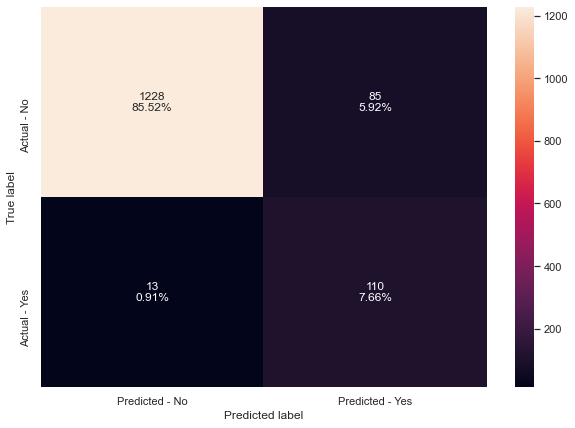

In [297]:
make_confusion_matrix(estimator,y_test)
get_metrics_score(estimator,X_train,X_test,y_train,y_test,'GridSearcCV',flag=True)

- Grid search underfitted our model and is no the helping us in improving our model performance  

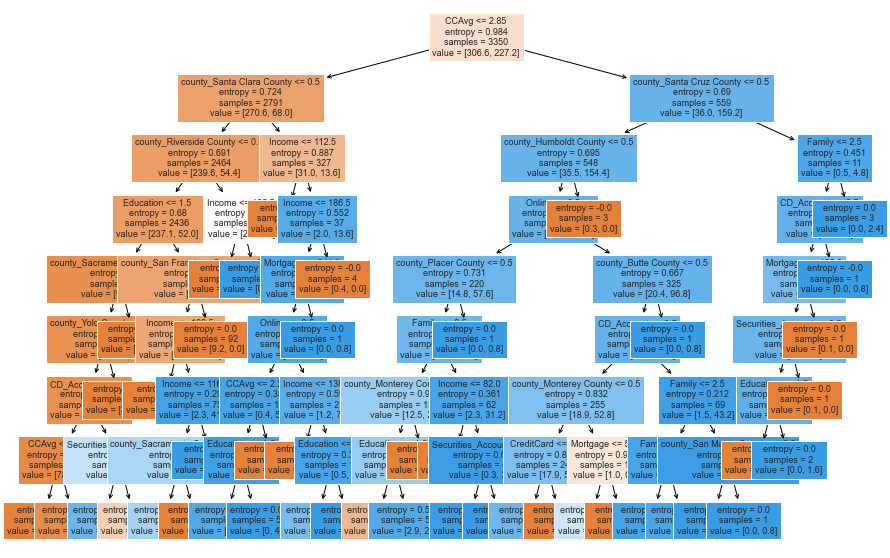

In [298]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


- With Grid search it looks like it has improved recall but precesion is very low
- Grid search kind of didn't achive our goal so far, I still see some overfit


## Improving model performance using cost complexity pruning

In [299]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [300]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000193    0.000580
2     0.000227    0.001717
3     0.000286    0.002288
4     0.000299    0.002587
5     0.000350    0.004688
6     0.000398    0.005086
7     0.000398    0.005484
8     0.000398    0.005882
9     0.000434    0.008487
10    0.000448    0.008935
11    0.000478    0.009412
12    0.000483    0.010862
13    0.000486    0.012321
14    0.000532    0.013385
15    0.000849    0.014235
16    0.000940    0.017054
17    0.001076    0.018130
18    0.001581    0.019711
19    0.003267    0.026246
20    0.003479    0.029725
21    0.006527    0.036252
22    0.020515    0.056767
23    0.049206    0.155178

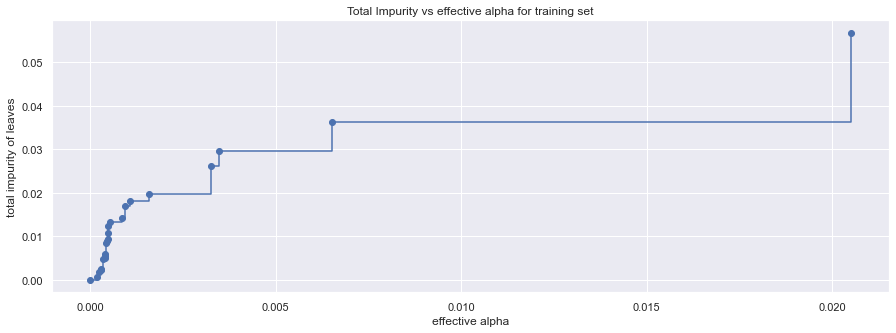

In [301]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- Impurities increased with an increase in alpha 

In [302]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.049205603953566796


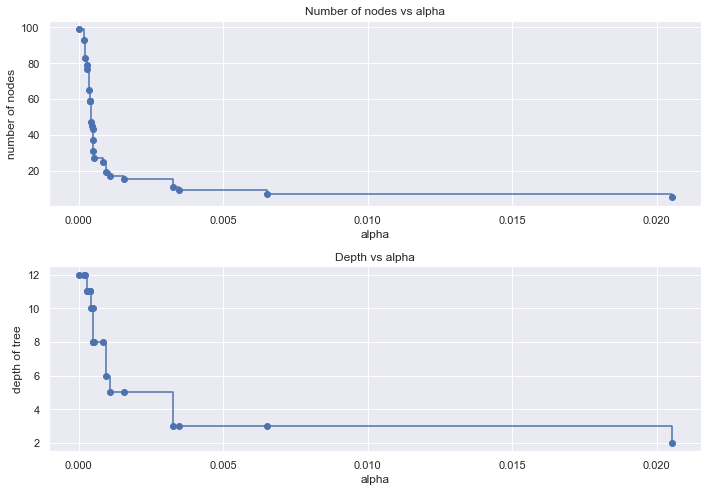

In [303]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

-  As alpha increases the number of nodes decrease
- As alpha increases the depth also decreases 

In [304]:
from statsmodels.tools.tools import add_constant
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor


num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))


Series before feature selection: 

const                            27.300587
Income                            1.668033
Family                            1.031045
CCAvg                             1.590953
Education                         1.037929
Mortgage                          1.013708
Securities_Account                1.148081
CD_Account                        1.326131
Online                            1.047423
CreditCard                        1.114072
county_Butte County               1.035638
county_Contra Costa County        1.145172
county_El Dorado County           1.029187
county_Fresno County              1.043000
county_Humboldt County            1.055342
county_Imperial County            1.006220
county_Kern County                1.092638
county_Lake County                1.008448
county_Los Angeles County         2.392117
county_Marin County               1.094278
county_Mendocino County           1.014555
county_Merced County              1.008955
county_Monterey Cou

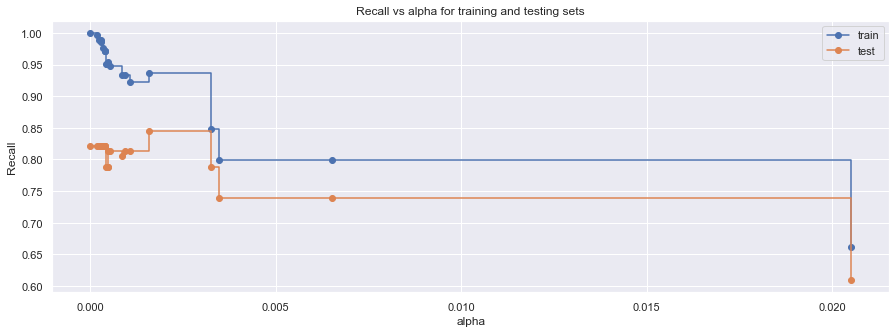

In [305]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

     - In higher accuracy of recall the test and train alpha values are far apart.
     - The test and train recall seem to merge in high alpha values as the tree get's to be simpler and simpler
     - Simple tree models can also result in underfit 

In [306]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0015810412531470457, random_state=1)


- Best model we have is of alpha value 0.0015

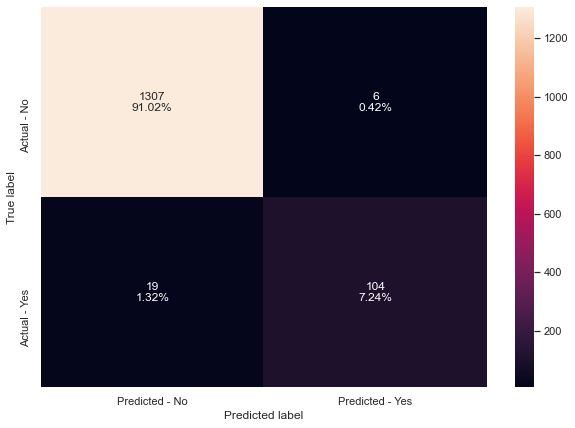

In [307]:
make_confusion_matrix(best_model,y_test)

In [308]:
get_metrics_score(best_model,X_train,X_test,y_train,y_test,'Post pruning',flag=True)

Accuracy on training set :  0.9883582089552239
Accuracy on test set :  0.9825905292479109
Recall on training set :  0.9366197183098591
Recall on test set :  0.8455284552845529
Precision on training set :  0.926829268292683
Precision on test set :  0.9454545454545454
F1 on training set :  0.9316987740805605
F1 on test set :  0.8927038626609443


['Post pruning',
 0.9883582089552239,
 0.9825905292479109,
 0.9366197183098591,
 0.8455284552845529,
 0.926829268292683,
 0.9454545454545454,
 0.9316987740805605,
 0.8927038626609443]

- Lets compare in what we got in the three metrics in below data frame

In [309]:
post_prune = get_metrics_score(best_model,X_train,X_test,y_train,y_test,'Post pruning',flag=True)
GridSearch = get_metrics_score(estimator,X_train,X_test,y_train,y_test,'GridSearch',flag=True)
default = get_metrics_score(dt,X_train,X_test,y_train,y_test,'default',flag=True)
df = pd.DataFrame([post_prune,GridSearch,default], columns=['Algo', 'Acc_train','Acc_test' ,'Recall_train','Recall_test','Pres_train','Pres_test', 'F1_Train','F1_Test'])
df.head()

Accuracy on training set :  0.9883582089552239
Accuracy on test set :  0.9825905292479109
Recall on training set :  0.9366197183098591
Recall on test set :  0.8455284552845529
Precision on training set :  0.926829268292683
Precision on test set :  0.9454545454545454
F1 on training set :  0.9316987740805605
F1 on test set :  0.8927038626609443
Accuracy on training set :  0.9280597014925374
Accuracy on test set :  0.9317548746518106
Recall on training set :  0.9507042253521126
Recall on test set :  0.8943089430894309
Precision on training set :  0.5432595573440644
Precision on test set :  0.5641025641025641
F1 on training set :  0.6914212548015365
F1 on test set :  0.6918238993710693
Accuracy on training set :  1.0
Accuracy on test set :  0.9777158774373259
Recall on training set :  1.0
Recall on test set :  0.8373983739837398
Precision on training set :  1.0
Precision on test set :  0.8956521739130435
F1 on training set :  1.0
F1 on test set :  0.8655462184873949


Algo  Acc_train  Acc_test  Recall_train  Recall_test  Pres_train  \
0  Post pruning   0.988358  0.982591      0.936620     0.845528    0.926829   
1    GridSearch   0.928060  0.931755      0.950704     0.894309    0.543260   
2       default   1.000000  0.977716      1.000000     0.837398    1.000000   

   Pres_test  F1_Train   F1_Test  
0   0.945455  0.931699  0.892704  
1   0.564103  0.691421  0.691824  
2   0.895652  1.000000  0.865546

- As we can see our F1 score for post pruning is higher than the other methods 

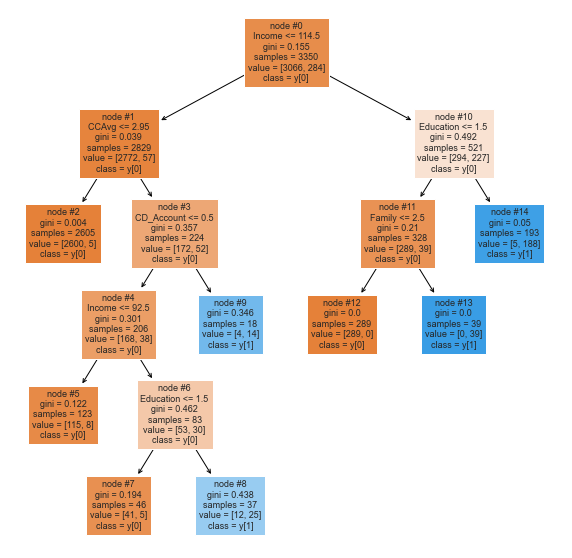

In [310]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

- The tree also kind of make sense as its not complex or simple.

In [311]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Education                      0.420677
Income                         0.354022
Family                         0.151440
CCAvg                          0.048181
CD_Account                     0.025681
county_Santa Clara County      0.000000
county_San Benito County       0.000000
county_San Bernardino County   0.000000
county_San Diego County        0.000000
county_San Francisco County    0.000000
county_San Joaquin County      0.000000
county_San Luis Obispo County  0.000000
county_San Mateo County        0.000000
county_Santa Barbara County    0.000000
county_Shasta County           0.000000
county_Santa Cruz County       0.000000
county_Riverside County        0.000000
county_Siskiyou County         0.000000
county_Solano County           0.000000
county_Sonoma County           0.000000
county_Stanislaus County       0.000000
county_Trinity County          0.000000
county_Tuolumne County         0.000000
county_Ventura County          0.000000


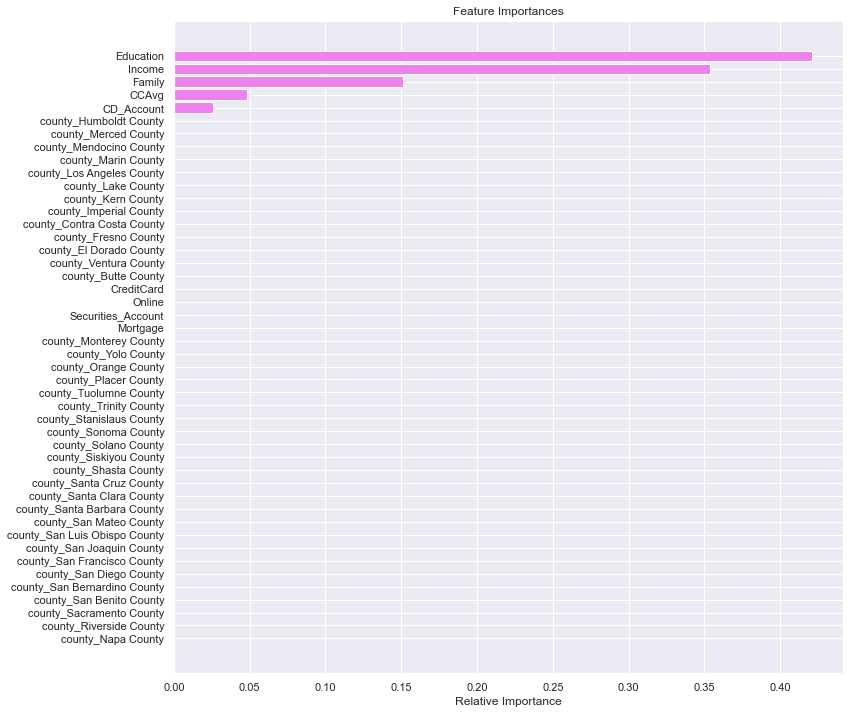

In [312]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- If we observe here the rank of our feature importance is changed education is coming on the top followed by income and family 

## Recommendations

- Education, Income and Family size, CCavg, cd account are important features which will significantly improve the chance of a customer to take a personal loan.
- zip code or the place a customer lives as well as online use doesn't have any impact on a chance of a customer to take loan
- The data is highly unbalanced, so it would be great if we have a balanced data where we have more number of people who accepted the offer of loan will be great source of information to infer more information.
- If we compare Decision Tree best F1 score on test data and Logistic regression best on test data, Decision Tree got 89 % while logistic regression got 65 %. So it's decision tree is the best algorithm for this problem.
